# **Project Title: Feature Selection & Dimension Reduction**

## **Project Members:**
- Meher Venkat Karri
- Vedant Patel
- Venkata Sainath Rameswarapu

# **Introduction**

For this project we used a dataset which contains about 60 featurea variables. These features include things like article content characteristics (like word count or sentiment), channel distribution (like whether the article is about technology, lifestyle, or business), and engagement metrics (like the amount of images or links in the article). But with so many variables, it's critical to find the most important ones to prevent overfitting and make sure our model stays effective and understandable.

The complexity of the dataset presents various difficulties, including managing multicollinearity, outliers, and unbalanced distributions across distinct variables. As a result, the goal of the study is to not only develop a precise prediction model but also to provide some insight into the characteristics that contribute most to article shares. Our goal is to develop a solid model that provides useful information about the popularity of online material while maintaining a balance between model complexity and performance.


**Intended Steps:**
- **Exploratory Data Analysis (EDA):** Conduct a thorough EDA to understand the distributions, correlations, and relationships between features and the response variable (shares). This step includes identifying outliers, multicollinearity, and data imbalances.

- **Feature Selection:** Apply methods like correlation analysis, Recursive Feature Elimination (RFE), and Principal Component Analysis (PCA) to select the most predictive features and reduce dimensionality.

- **Model Building:** Train various predictive models like linear regression and evaluate their performance using metrics like R^2.

- **Cross-Validation and Evaluation:** Use cross-validation to assess model performance, ensuring that selected features generalize well to unseen data.

# **Importing Lib**

In [1]:
# importing all the necessary libraries required -Vedant
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# **Fechting Dataset**

In [2]:
# loading dataset -vedant
df=pd.read_csv('https://raw.githubusercontent.com/Vedant278/DAV-6150/refs/heads/main/M4_Data.csv')
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [3]:
# - vedant
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
# checking null values - vedant
null_val = df.isnull().sum()
null_percent = (df.isnull().sum()/len(df))*100
min_val = df.min(numeric_only=True)
max_val = df.max(numeric_only=True)
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]
unique_val = df.nunique()
null_df = pd.DataFrame({'null_val': null_val, 'null_percent': null_percent,'min': min_val,'max': max_val,
                        'mean': mean,'median': median,'mode': mode, 'unique_values': unique_val})
pd.set_option('display.max_rows',None)
null_df

null_val  null_percent      min  \
 LDA_00                                0           0.0  0.00000   
 LDA_01                                0           0.0  0.00000   
 LDA_02                                0           0.0  0.00000   
 LDA_03                                0           0.0  0.00000   
 LDA_04                                0           0.0  0.00000   
 abs_title_sentiment_polarity          0           0.0  0.00000   
 abs_title_subjectivity                0           0.0  0.00000   
 average_token_length                  0           0.0  0.00000   
 avg_negative_polarity                 0           0.0 -1.00000   
 avg_positive_polarity                 0           0.0  0.00000   
 data_channel_is_bus                   0           0.0  0.00000   
 data_channel_is_entertainment         0           0.0  0.00000   
 data_channel_is_lifestyle             0           0.0  0.00000   
 data_channel_is_socmed                0           0.0  0.00000   
 data_channel_is_tech                  0           0.0  0.00000   
 data_channel_is_world                 0           0.0  0.00000   
 global_rate_negative_words            0           0.0  0.00000   
 global_rate_positive_words            0           0.0  0.00000   
 global_sentiment_polarity             0           0.0 -0.39375   
 global_subjectivity                   0           0.0  0.00000   
 is_weekend                            0           0.0  0.00000   
 kw_avg_avg                            0           0.0  0.00000   
 kw_avg_max                            0           0.0  0.00000   
 kw_avg_min                            0           0.0 -1.00000   
 kw_max_avg                            0           0.0  0.00000   
 kw_max_max                            0           0.0  0.00000   
 kw_max_min                            0           0.0  0.00000   
 kw_min_avg                            0           0.0 -1.00000   
 kw_min_max                            0           0.0  0.00000   
 kw_min_min                            0           0.0 -1.00000   
 max_negative_polarity                 0           0.0 -1.00000   
 max_positive_polarity                 0           0.0  0.00000   
 min_negative_polarity                 0           0.0 -1.00000   
 min_positive_polarity                 0           0.0  0.00000   
 n_non_stop_unique_tokens              0           0.0  0.00000   
 n_non_stop_words                      0           0.0  0.00000   
 n_tokens_content                      0           0.0  0.00000   
 n_tokens_title                        0           0.0  2.00000   
 n_unique_tokens                       0           0.0  0.00000   
 num_hrefs                             0           0.0  0.00000   
 num_imgs                              0           0.0  0.00000   
 num_keywords                          0           0.0  1.00000   
 num_self_hrefs                        0           0.0  0.00000   
 num_videos                            0           0.0  0.00000   
 rate_negative_words                   0           0.0  0.00000   
 rate_positive_words                   0           0.0  0.00000   
 self_reference_avg_sharess            0           0.0  0.00000   
 self_reference_max_shares             0           0.0  0.00000   
 self_reference_min_shares             0           0.0  0.00000   
 shares                                0           0.0  1.00000   
 timedelta                             0           0.0  8.00000   
 title_sentiment_polarity              0           0.0 -1.00000   
 title_subjectivity                    0           0.0  0.00000   
 weekday_is_friday                     0           0.0  0.00000   
 weekday_is_monday                     0           0.0  0.00000   
 weekday_is_saturday                   0           0.0  0.00000   
 weekday_is_sunday                     0           0.0  0.00000   
 weekday_is_thursday                   0           0.0  0.00000   
 weekday_is_tuesday                    0           0.0  0.00000   
 weekday_is_

<Axes: >

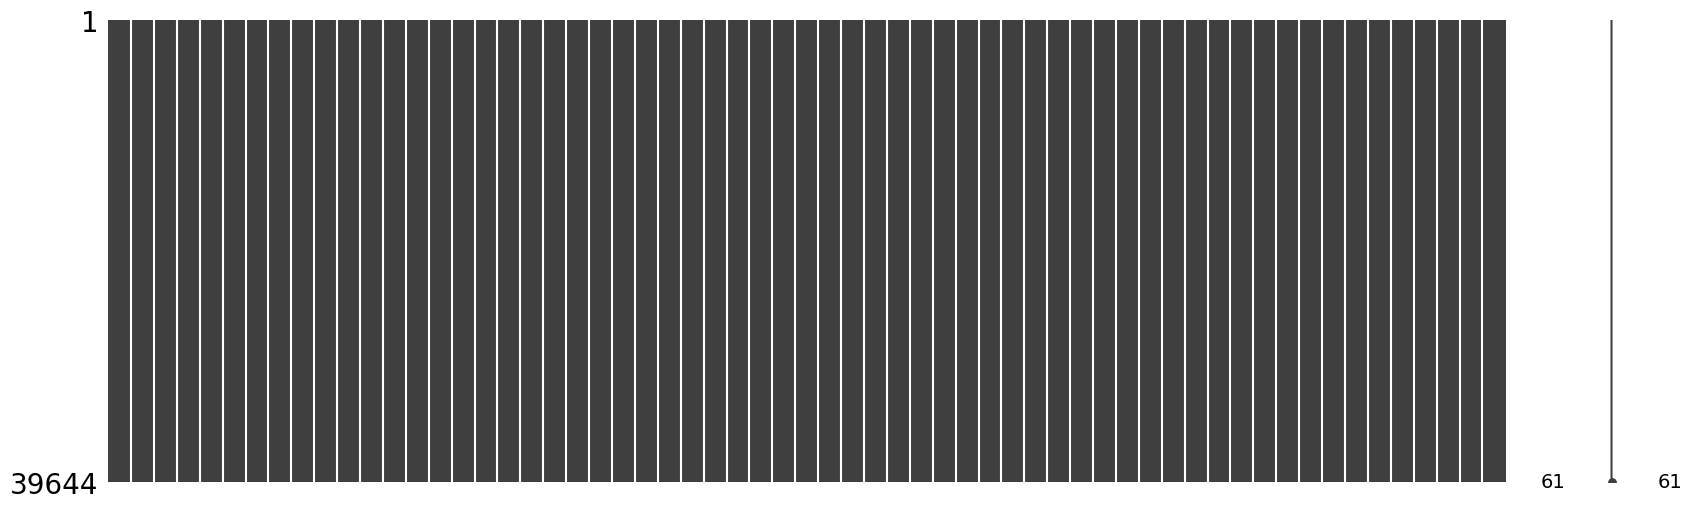

In [5]:
# Graphical representation of null Values - vedant
mno.matrix(df, figsize = (20, 6))

There are no missing values as we can see in the above image

In [6]:
df.duplicated().sum()

0

In [7]:
# droping Url col and Timedelta Because they are non - Predictive and doesn't have any impact on Target variable - vedant
df.drop('url',axis=1,inplace=True)
df.drop(' timedelta',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

In [8]:
#- vedant
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

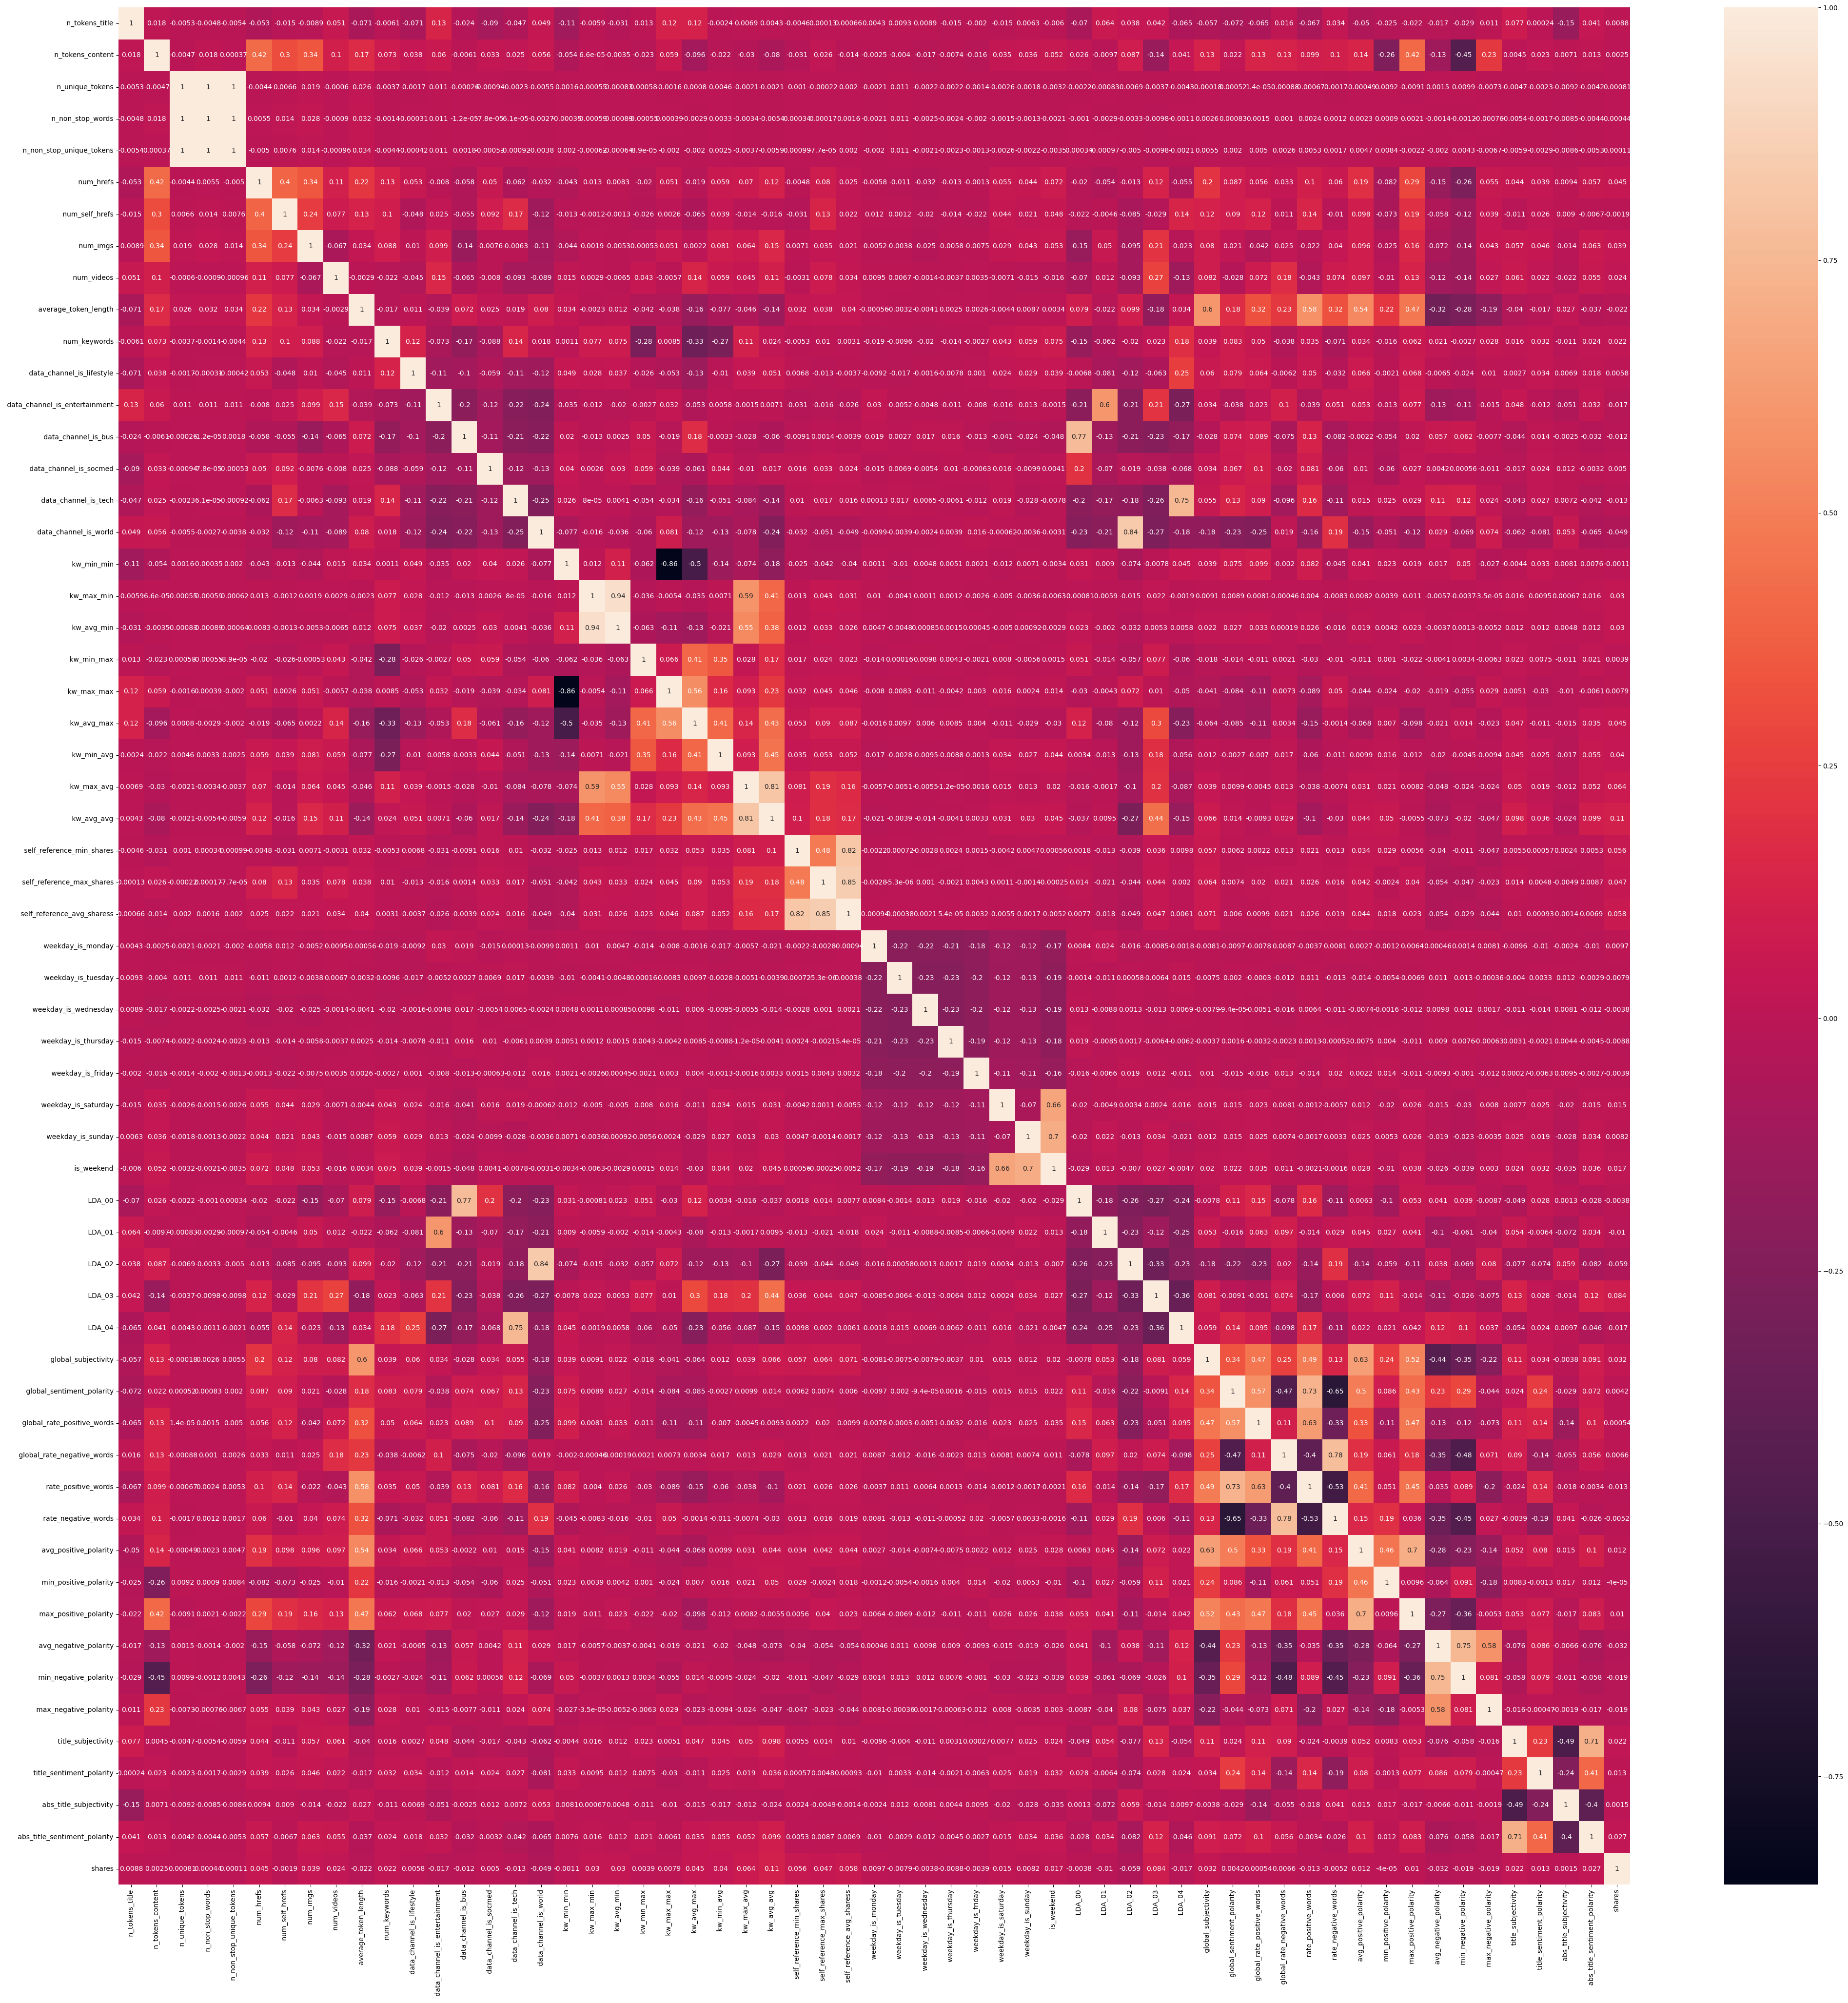

In [9]:
# Heatmap - vedant
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)
plt.show()

According to the heatmap we can observe that most of the variables are highly multicollinear. Hence, we shall be removing few attributes which are highly corelated with other variables

In [10]:
#dropping highly correlated variables - vedant
df.drop([' n_non_stop_words', ' n_non_stop_unique_tokens',' kw_avg_min'],axis=1,inplace=True)
df.shape

(39644, 56)

Grouping the columns

In [11]:
# - Meher
Tokens_col = [' n_tokens_title', ' n_tokens_content',' n_unique_tokens',' average_token_length']

data_channel= [' data_channel_is_lifestyle', ' data_channel_is_entertainment',' data_channel_is_bus', ' data_channel_is_socmed',
               ' data_channel_is_tech', ' data_channel_is_world']

kw_col = [' kw_min_min', ' kw_max_min', ' kw_avg_avg', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg']

self_reference = [' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess']

weekday = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday']

weekend = [' is_weekend']

LDA_col = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']

global_cols = [' global_subjectivity',' global_sentiment_polarity', ' global_rate_positive_words',' global_rate_negative_words']

number_cols = [' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',' num_keywords']

rate_cols = [' rate_positive_words',' rate_negative_words']

polarity_cols = [' avg_positive_polarity',' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',' max_negative_polarity']

title_cols = [' title_subjectivity',' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']

shares = [' shares']

In [12]:
# Using boxplot and histplot definition which takes two prams columns and dataframe and plot the graph as output - Meher
def boxplot(col,df):
  plt.figure(figsize=(20,30))
  for i,j in itertools.zip_longest(col,range(len(col))):
    plt.subplot(3,3,j+1)
    sns.boxplot(df[i])
    plt.title(i)

def histplot(col,df):
  plt.figure(figsize=(20,30))
  for i,j in itertools.zip_longest(col,range(len(col))):
    plt.subplot(3,3,j+1)
    sns.histplot(df[i],kde=True)
    plt.title(i)

# **Data Prep**

visaulization using boxplot and histplot to understand the distribution of data and examine the outliers. As the columns are already grouped it also allows to compare with other variables in the group



 **Token Columns**

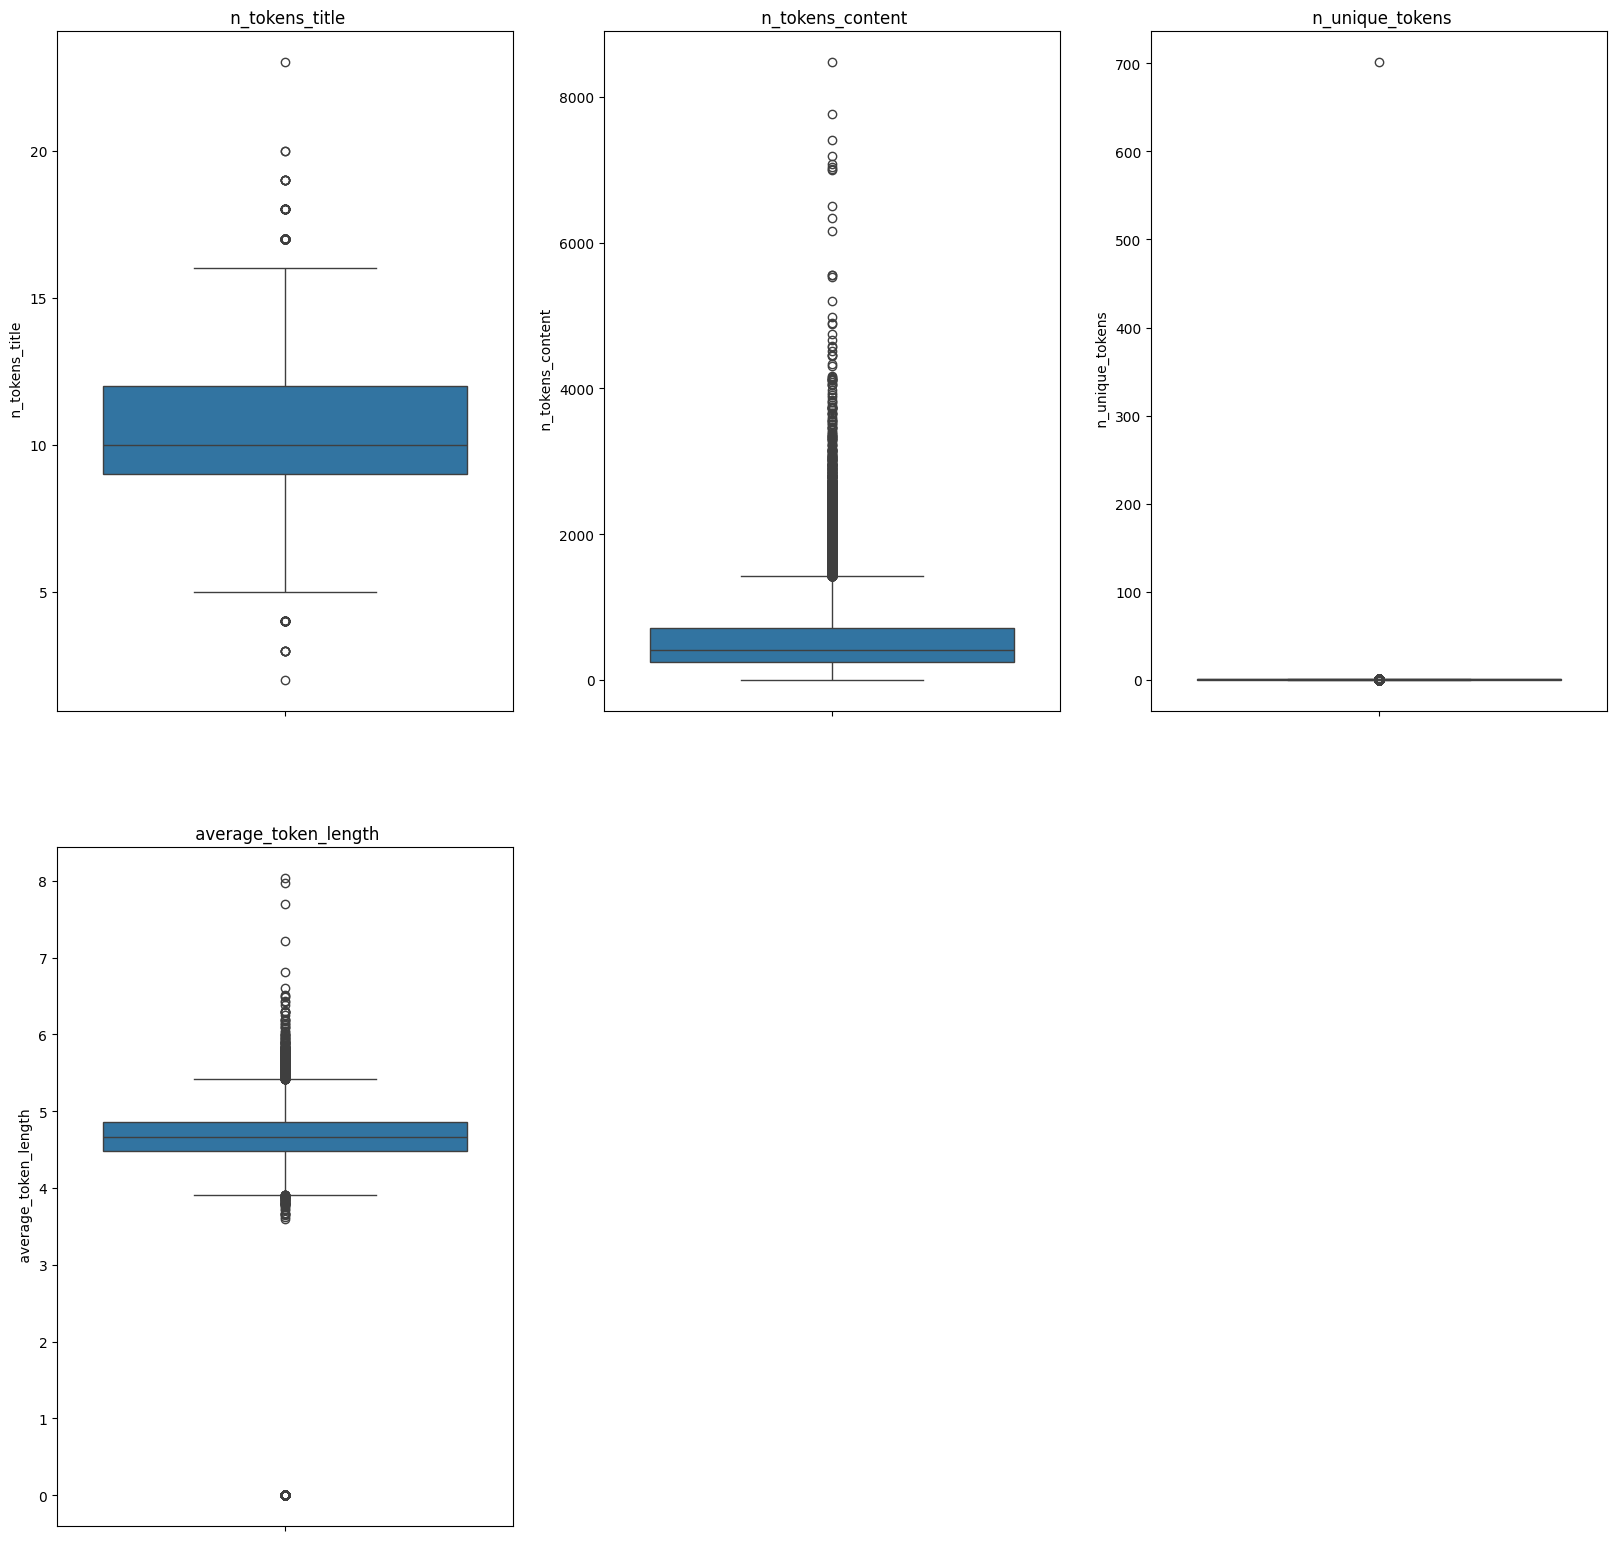

In [13]:
# - vedant
boxplot(Tokens_col,df)

The box plots show that all four variables ("n_tokens_title," "n_tokens_content," "n_unique_tokens," and "average_token_length") have a significant number of outliers, especially "n_tokens_content" and "n_unique_tokens." This suggests that the dataset contains many articles with extreme values for these features, which could be affecting the model's performance.

**Data Channel columnns**

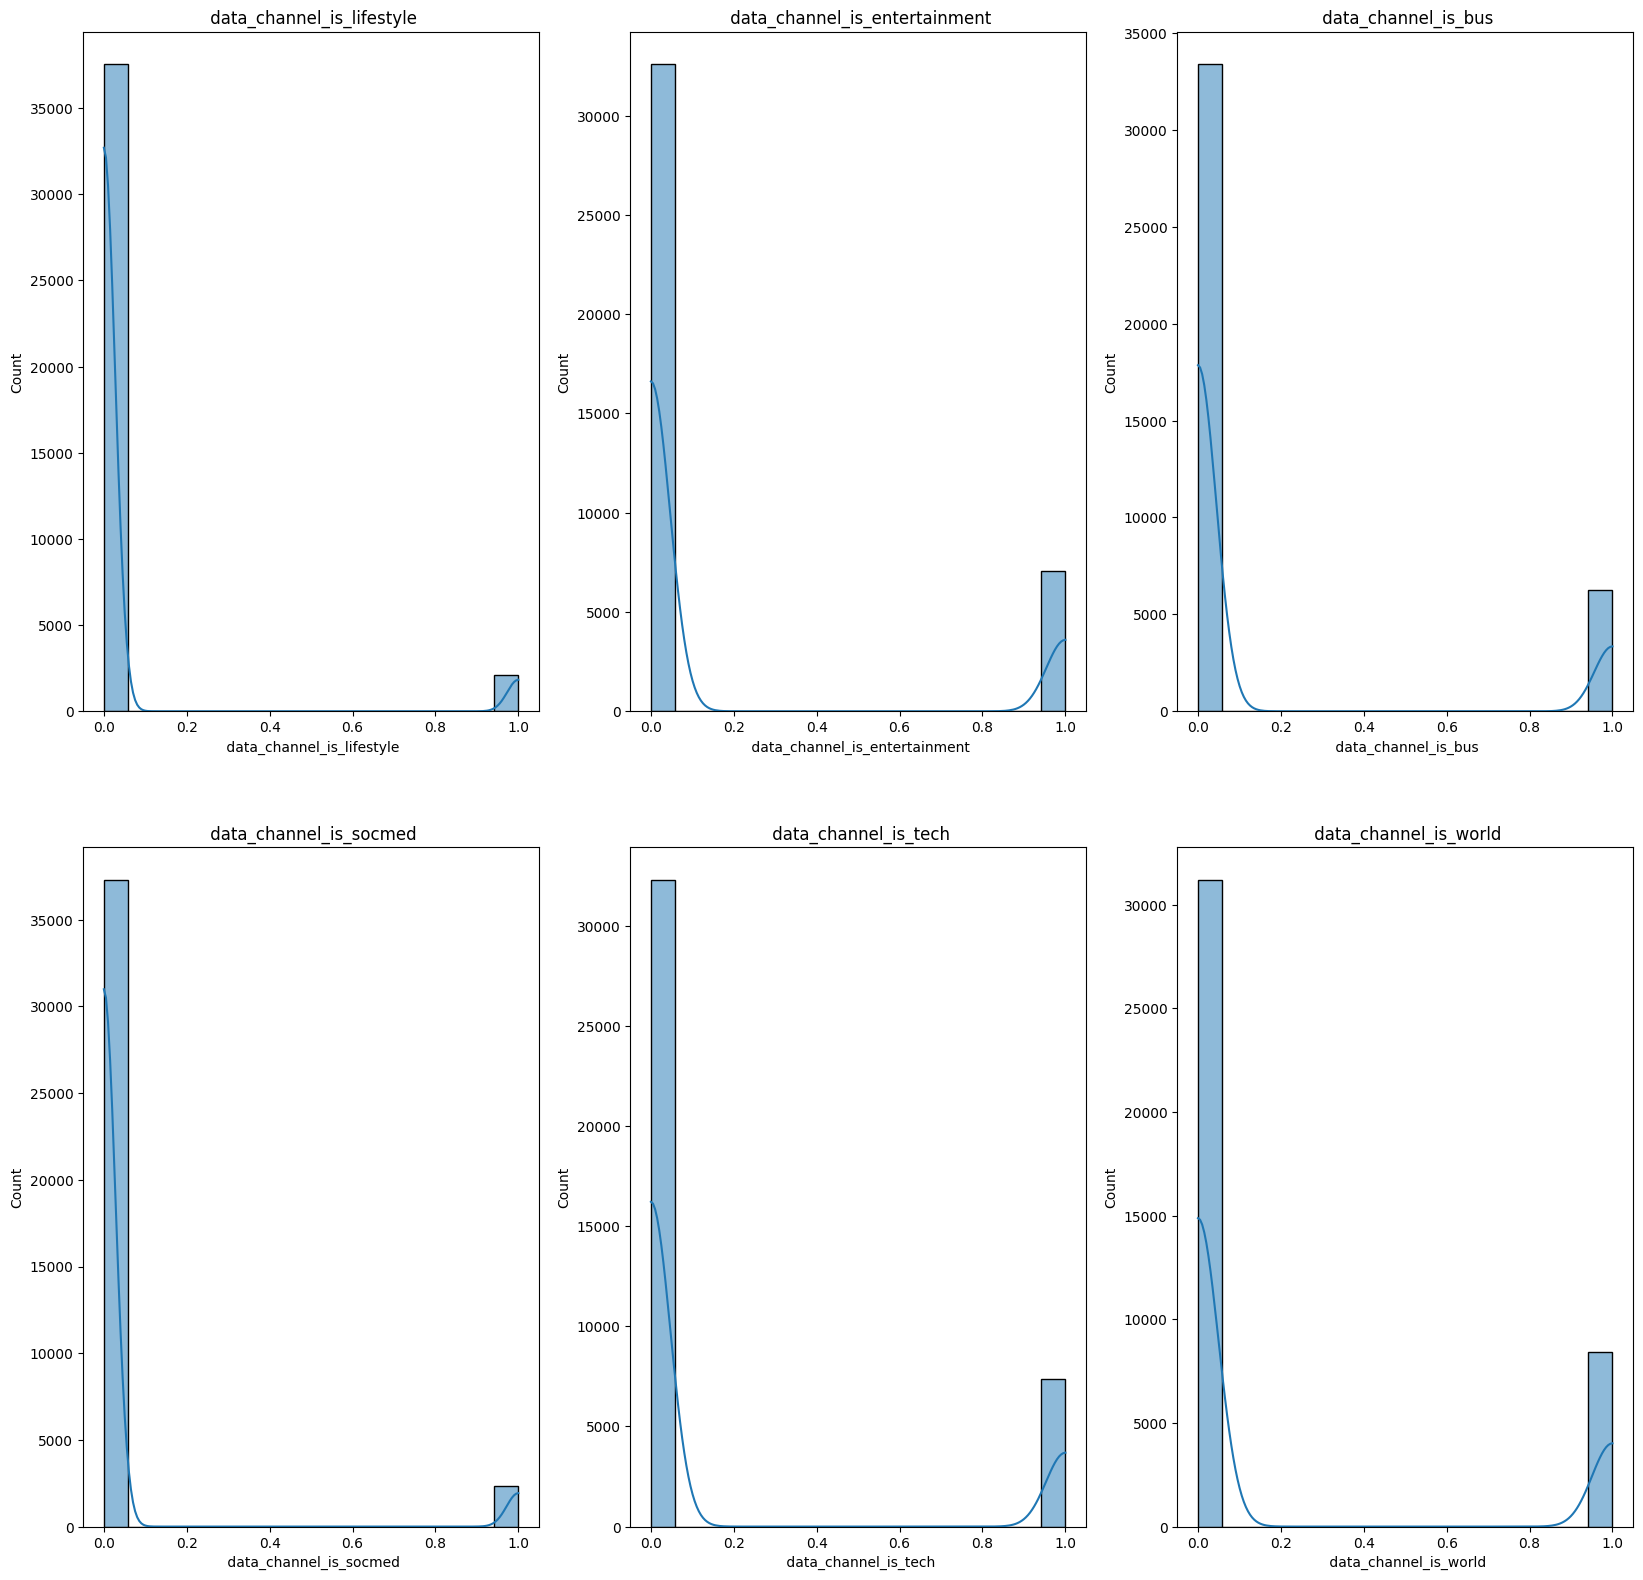

In [14]:
# - vedant
histplot(data_channel,df)

The histograms for the six data channels ("lifestyle," "entertainment," "bus," "socmed," "tech," and "world") indicate that most articles do not belong to any specific channel (value = 0). Only a small proportion of articles fall under each category (value = 1), suggesting an imbalanced distribution across channels. This imbalance may impact model performance, and handling this skew could improve predictive accuracy.

 **KW_col**

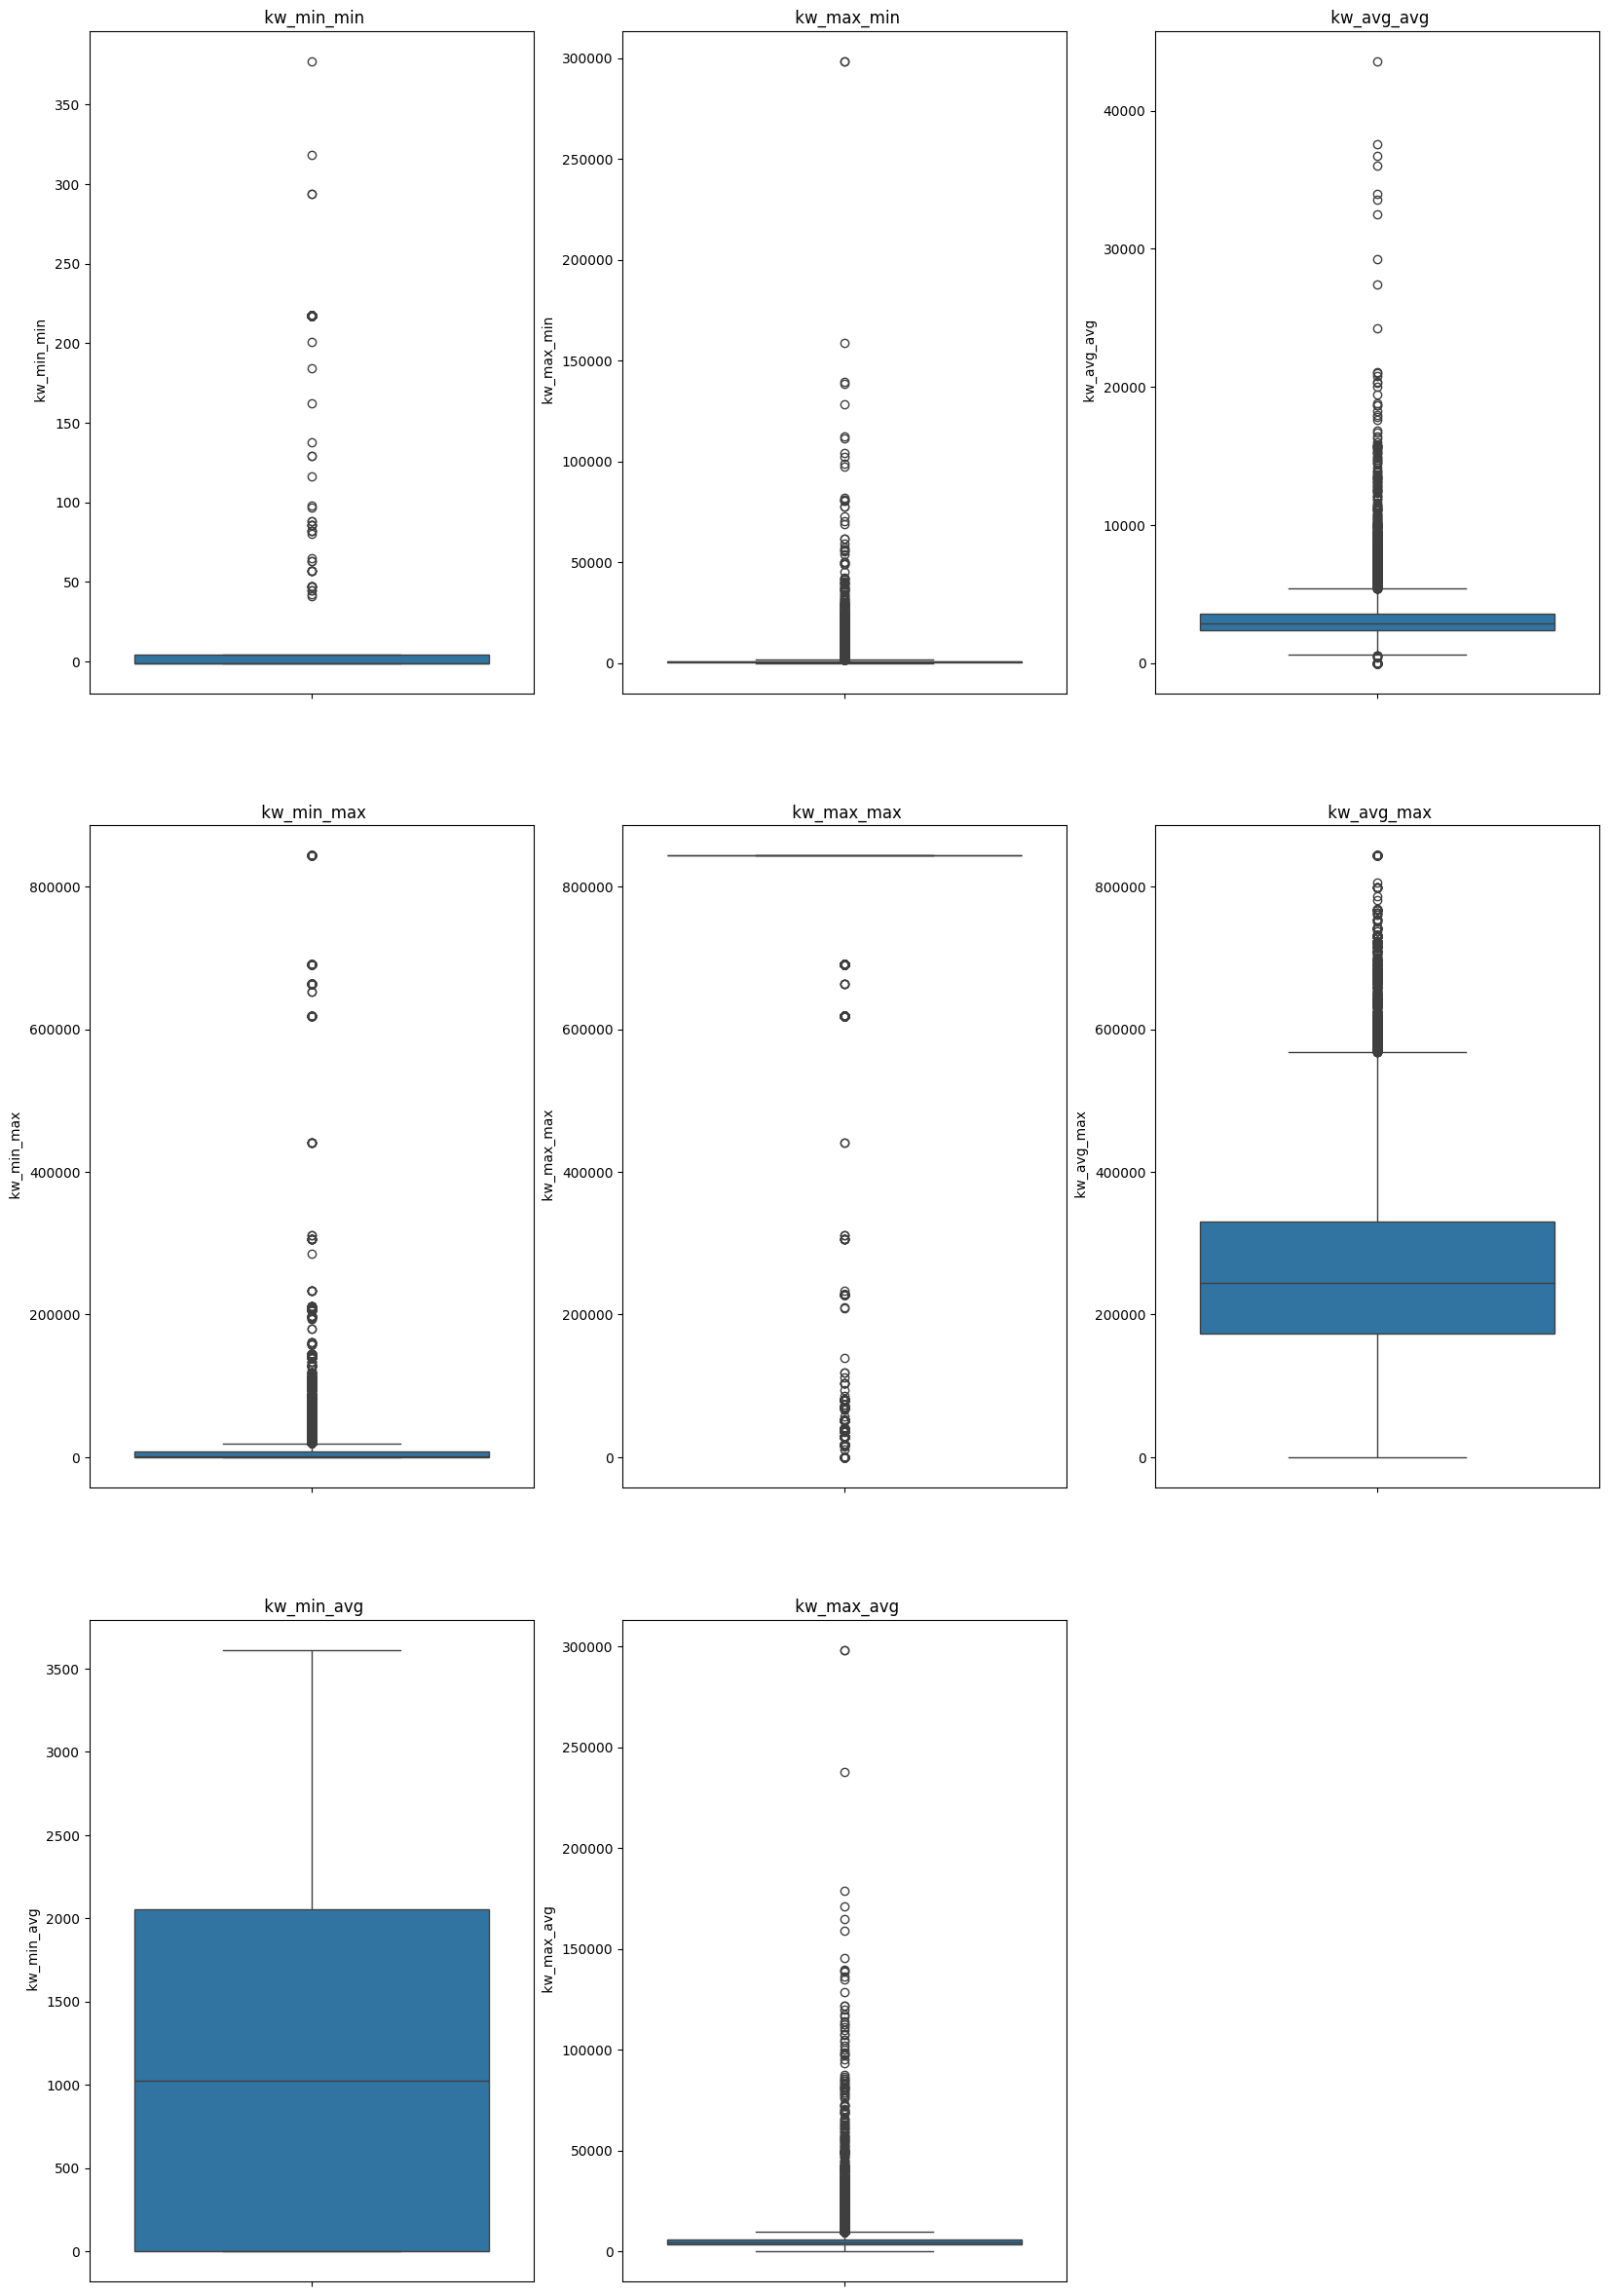

In [15]:
# - vedant
boxplot(kw_col,df)

The variables "kw_min_min," "kw_max_min," "kw_avg_avg,"  and indicate that all these variables have significant outliers. For instance, features like "kw_max_max" and "kw_min_max" show extremely high values that deviate considerably from the median, suggesting potential outliers that could distort the predictive model if not handled properly. Most of these variables are heavily skewed towards lower values, meaning the majority of data points are clustered near the bottom, with a few extreme cases stretching far higher.

 **Self_ref**

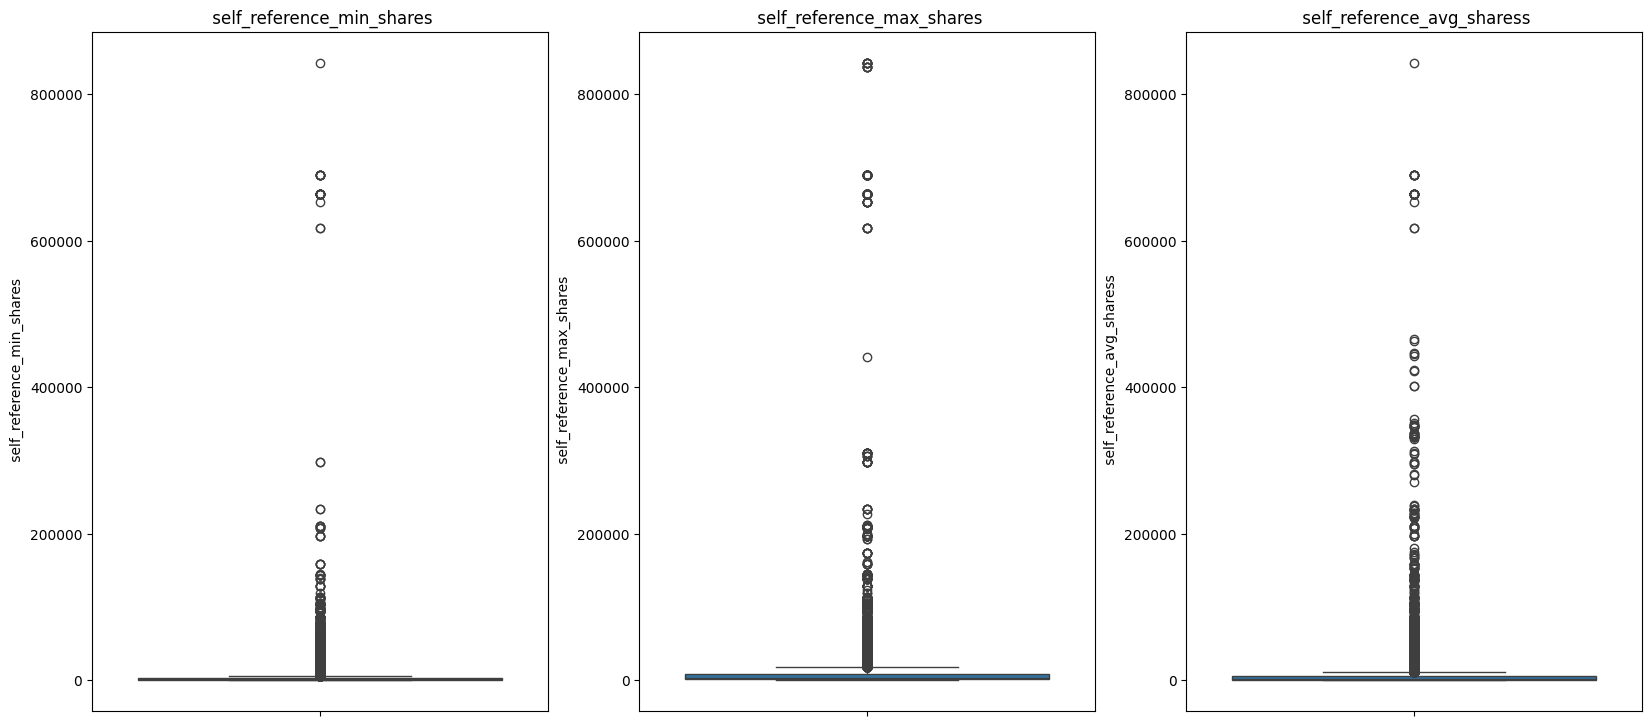

In [16]:
# - vedant
boxplot(self_reference,df)

"self_reference_min_shares," "self_reference_max_shares," and "self_reference_avg_sharess" show that these variables have a substantial number of extreme outliers, with values reaching as high as 800,000. Most data points are concentrated near the lower end, indicating that only a few articles have exceptionally high self-referenced shares. This suggests that while most articles have relatively low self-referenced shares, a few outliers significantly skew the distribution.

**Weekday & weekend**

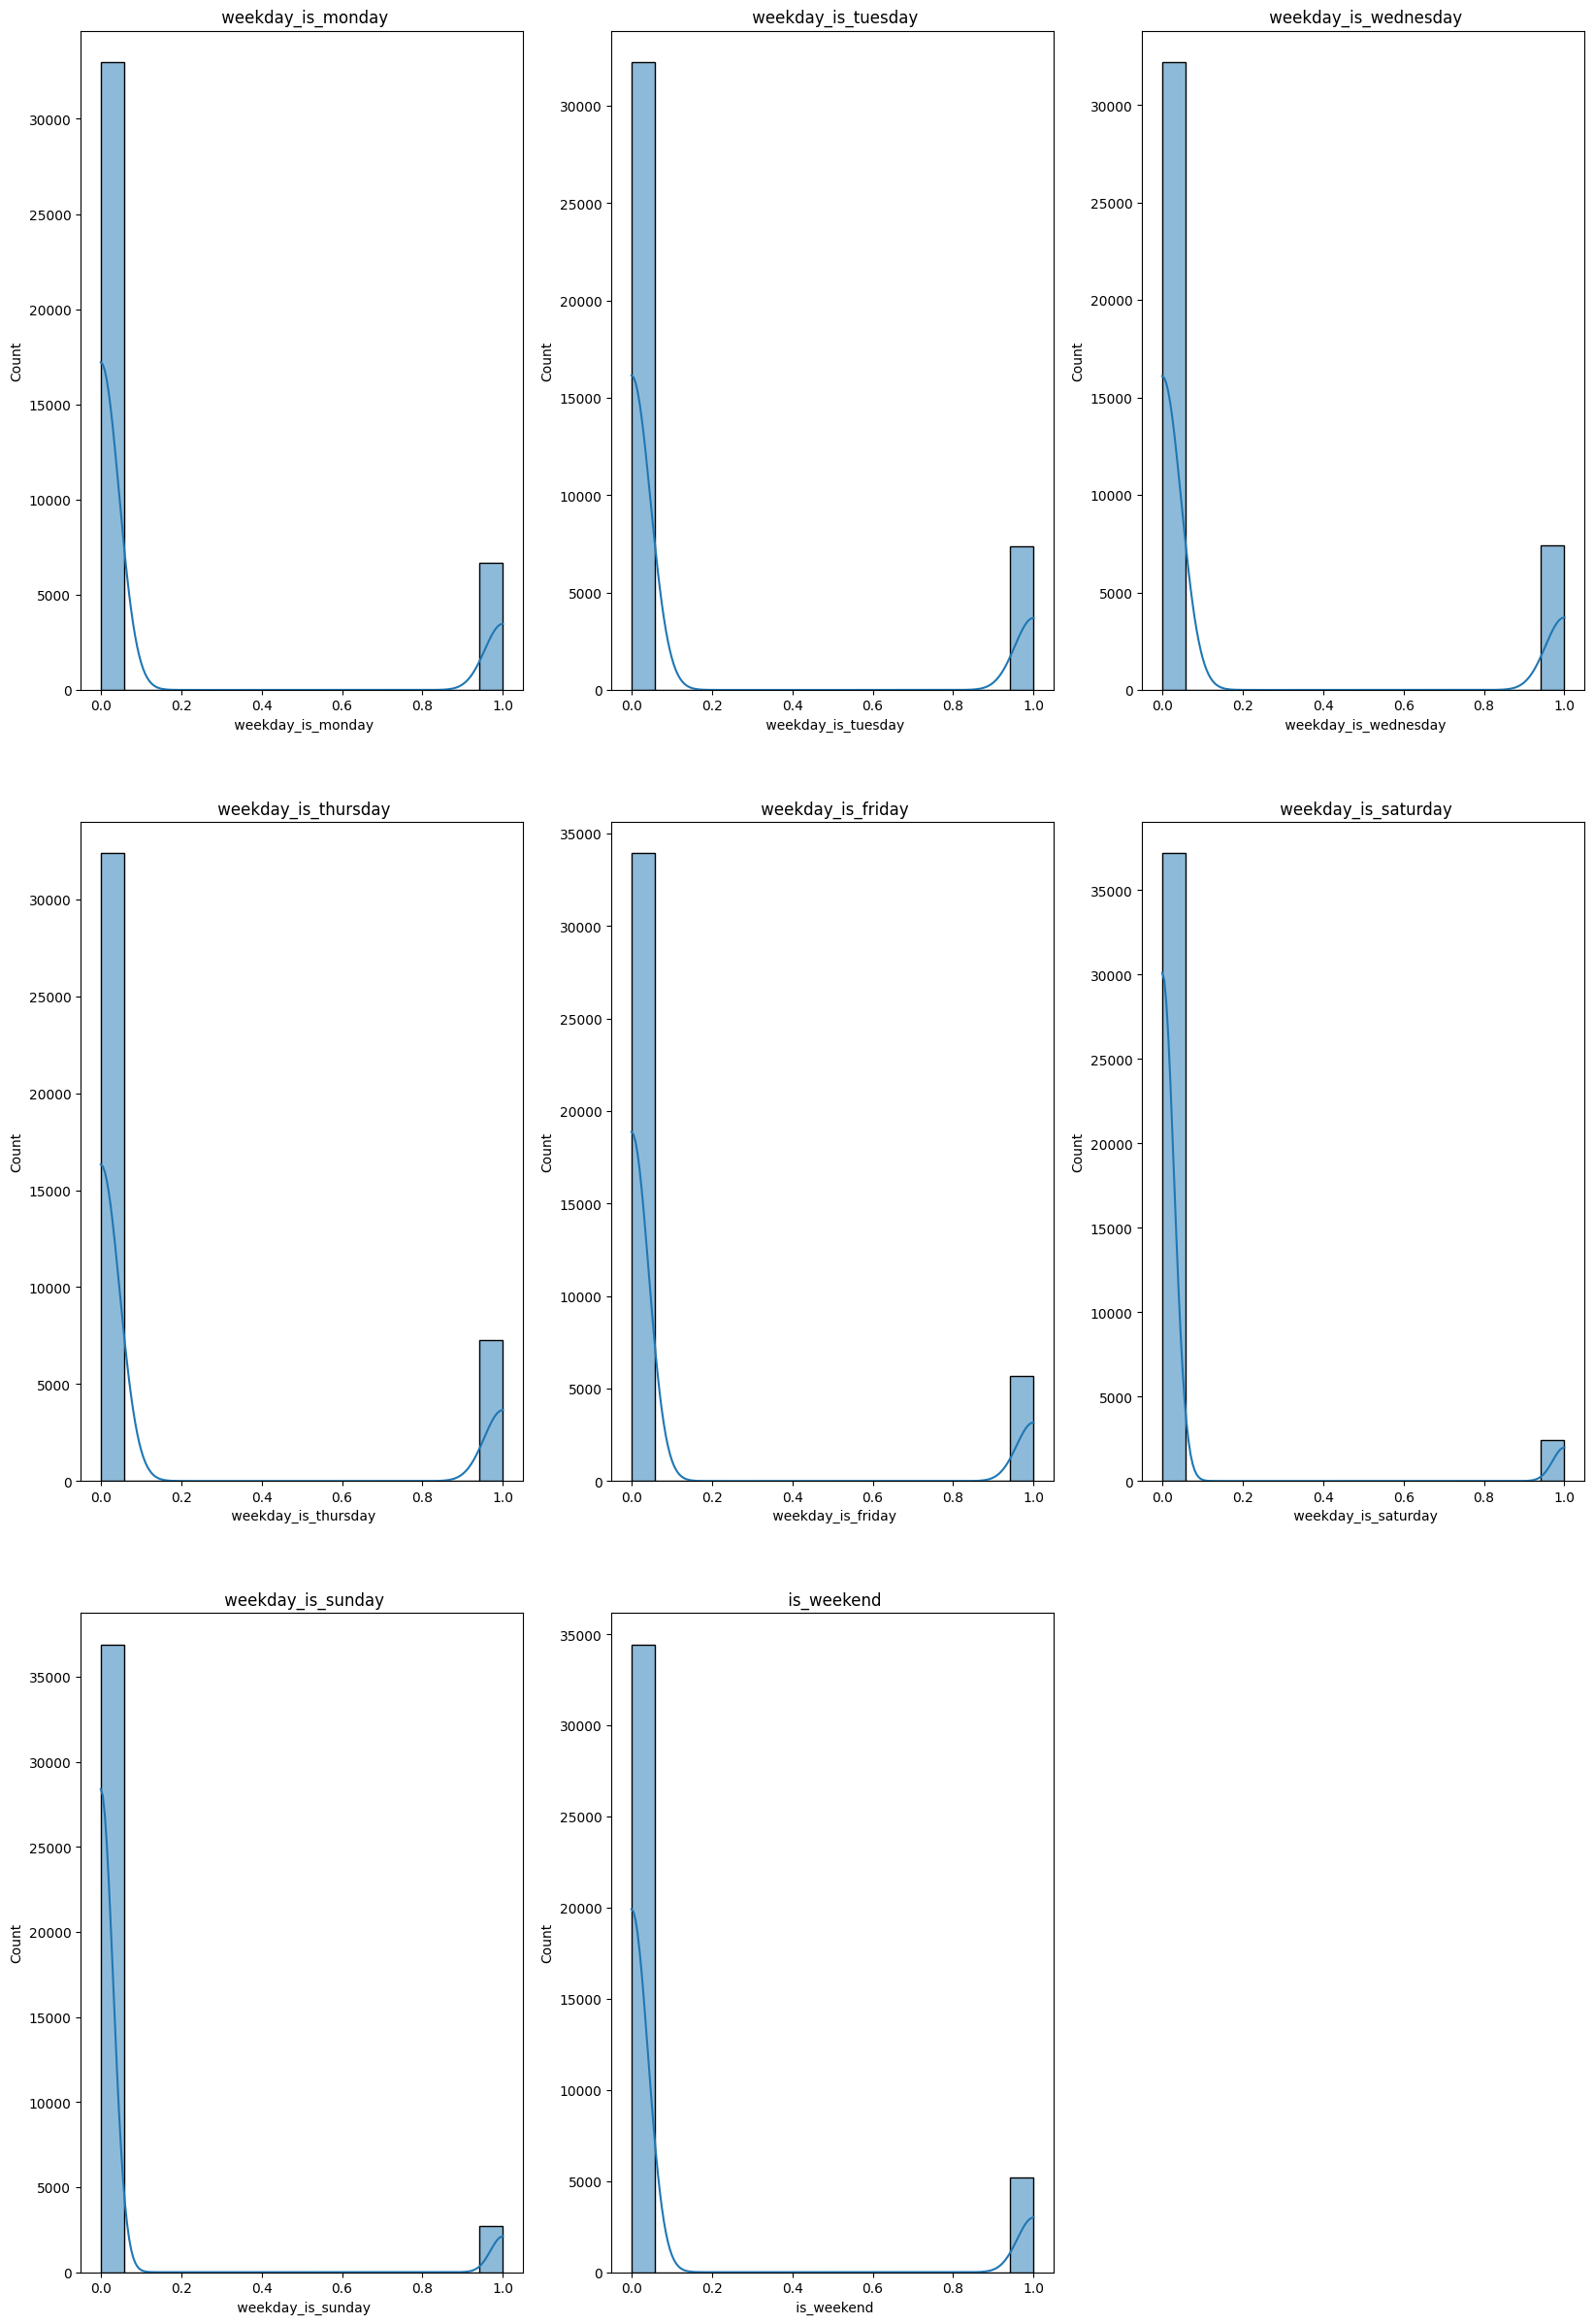

In [17]:
# - vedant
histplot(weekday + weekend,df)

The histograms shows that the vast majority of articles are not associated with specific weekdays or weekends, as seen by the dominant counts at 0 for each variable. This suggests that most articles are not explicitly tied to a particular day of the week or weekend status. The relatively smaller counts at 1 indicate fewer articles being assigned to these days, which implies an imbalanced distribution.

**LDA_col**

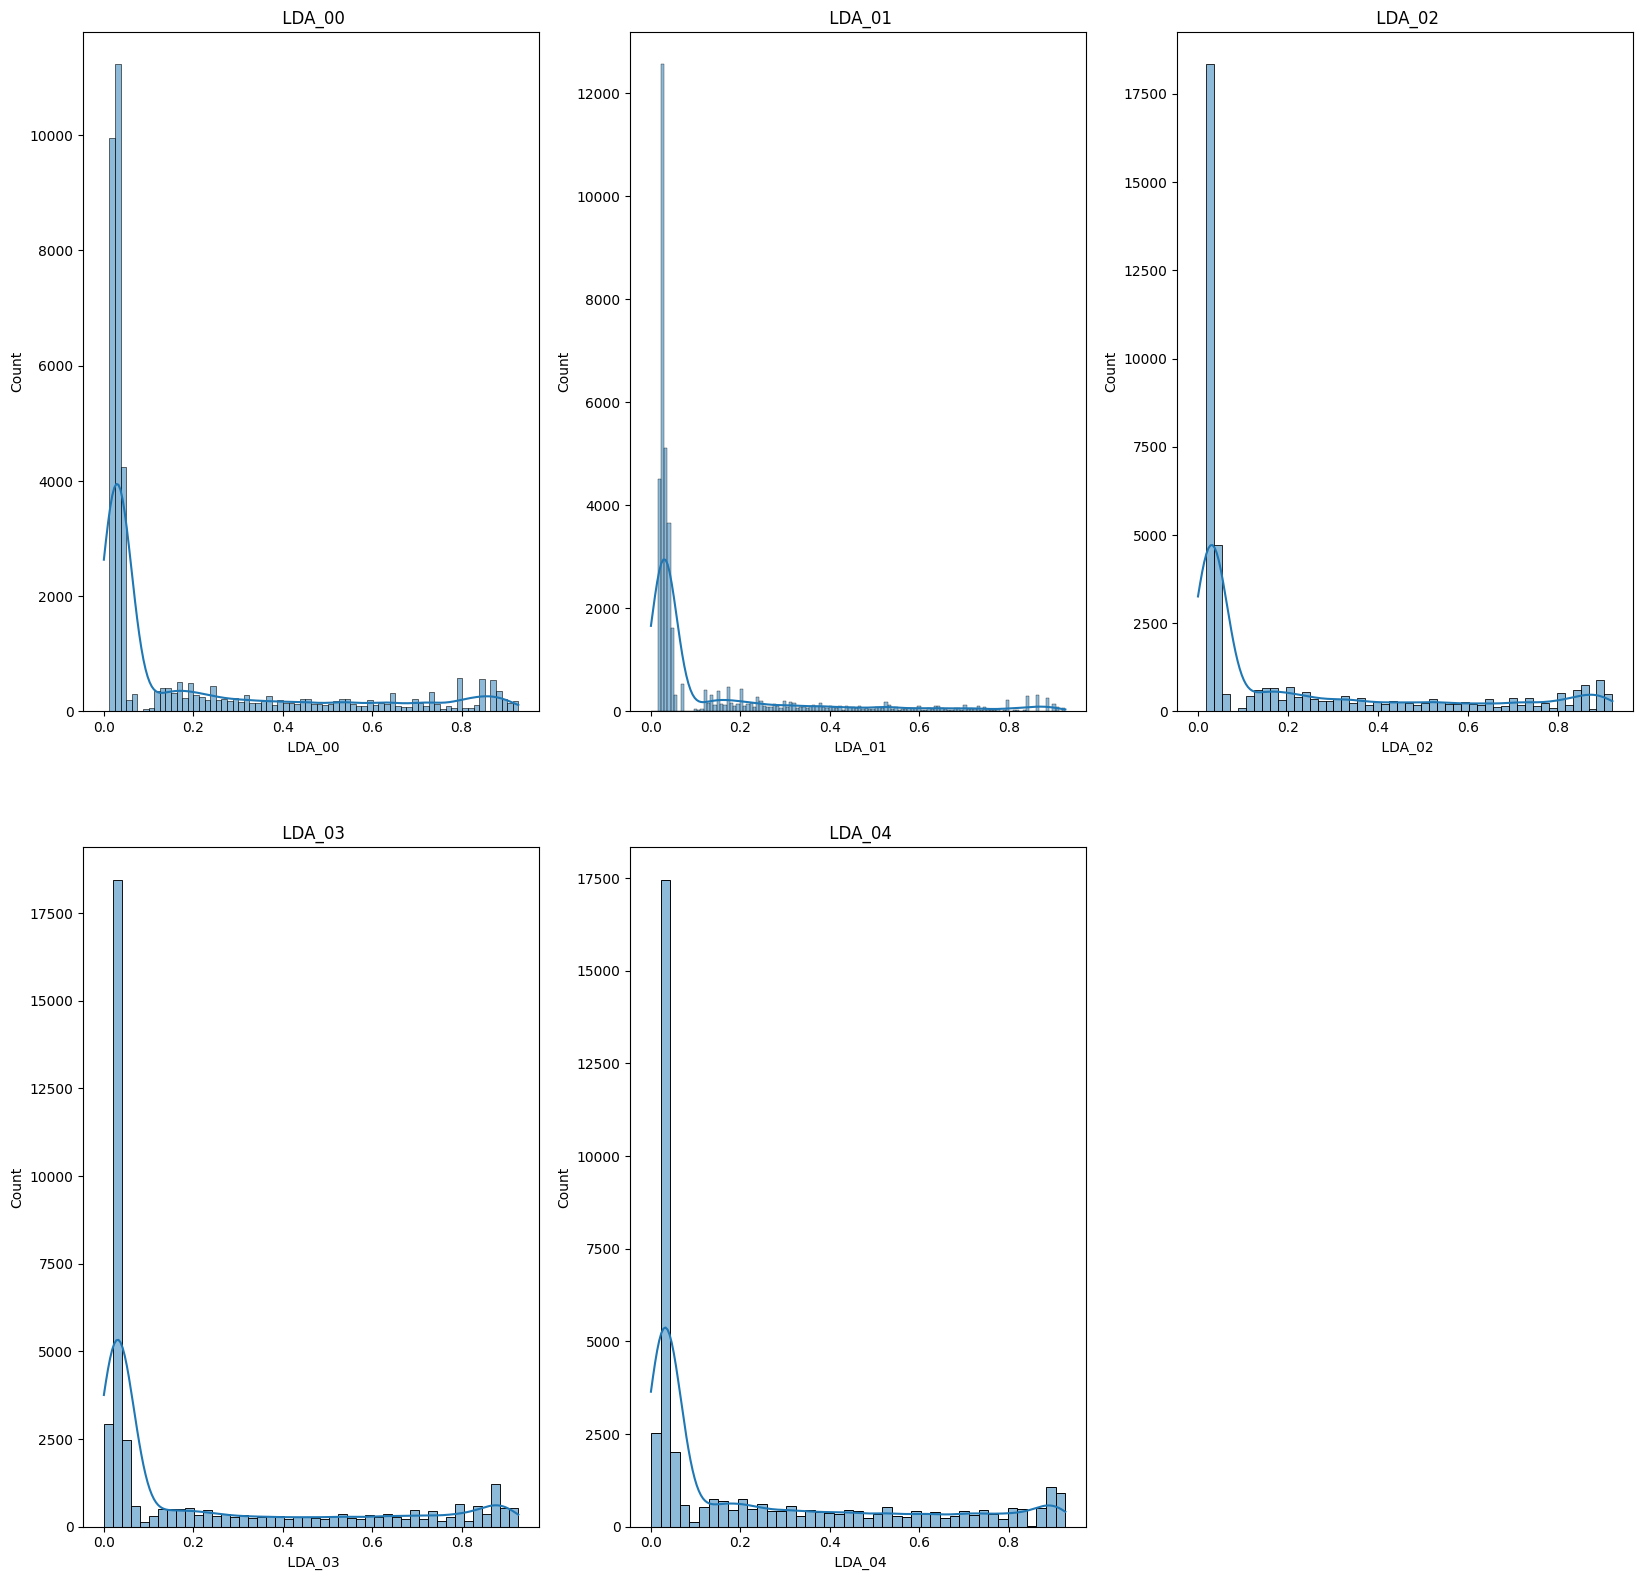

In [18]:
# - vedant
histplot(LDA_col,df)

The histograms for the LDA (Latent Dirichlet Allocation) topic variables (LDA_00 to LDA_04) shows that most values are concentrated near 0, suggesting that the majority of articles have a very low association with each LDA topic. There are a few articles with stronger associations (values closer to 1), but these are much less frequent. This skewed distribution implies that most articles are not strongly influenced by these specific LDA topics, and only a small subset of articles show a significant topic alignment.

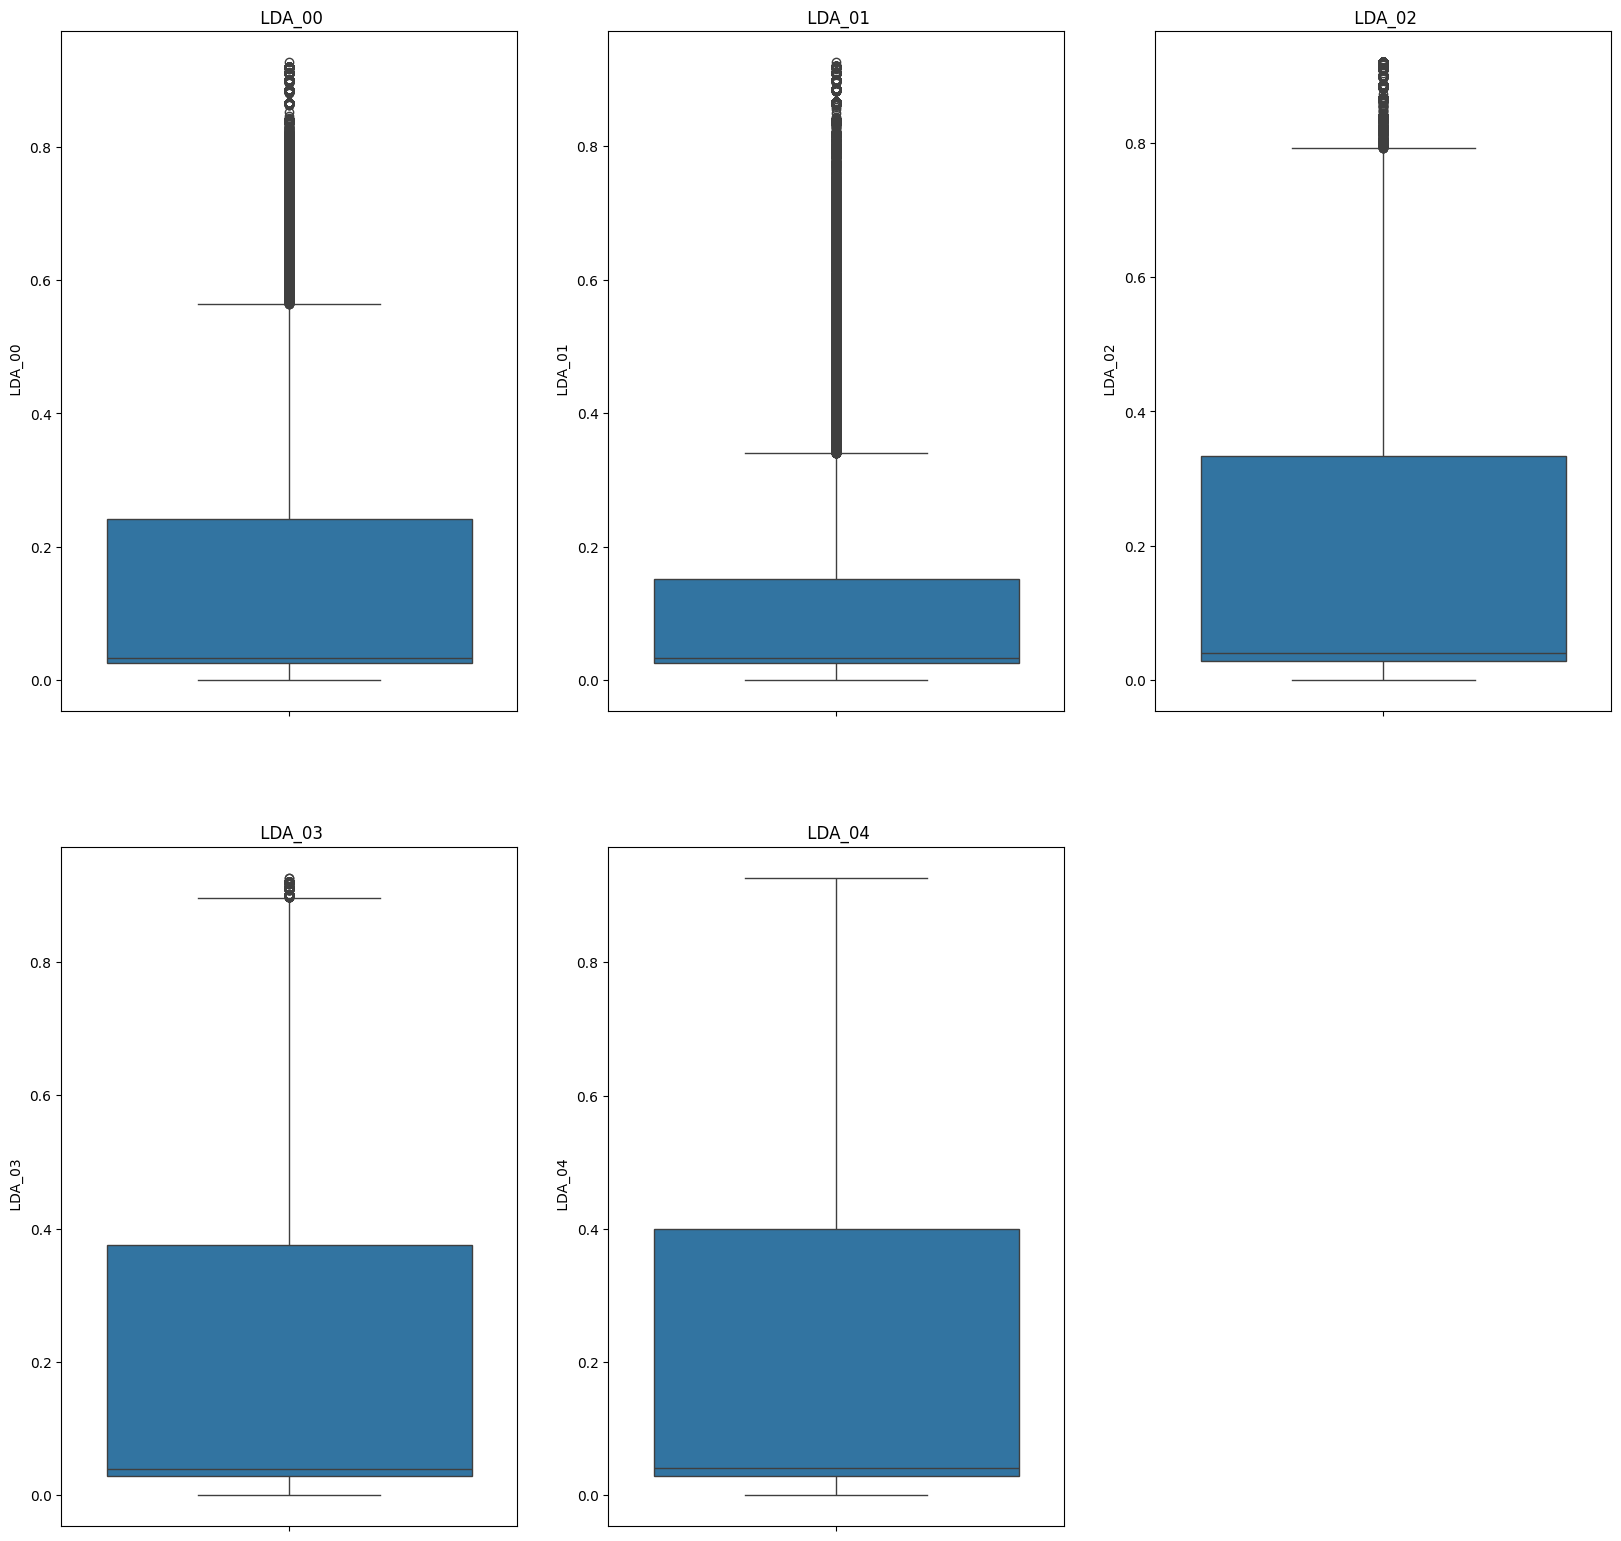

In [19]:
# - vedant
boxplot(LDA_col,df)

The box plots for the LDA (Latent Dirichlet Allocation) variables (LDA_00 to LDA_04) show that most of the data points are concentrated in the lower ranges, with median values around 0.2. There are numerous outliers at the upper end, especially above 0.8, suggesting that while most articles have a low association with these topics, a few are strongly influenced by them.

**GLobal_cols**

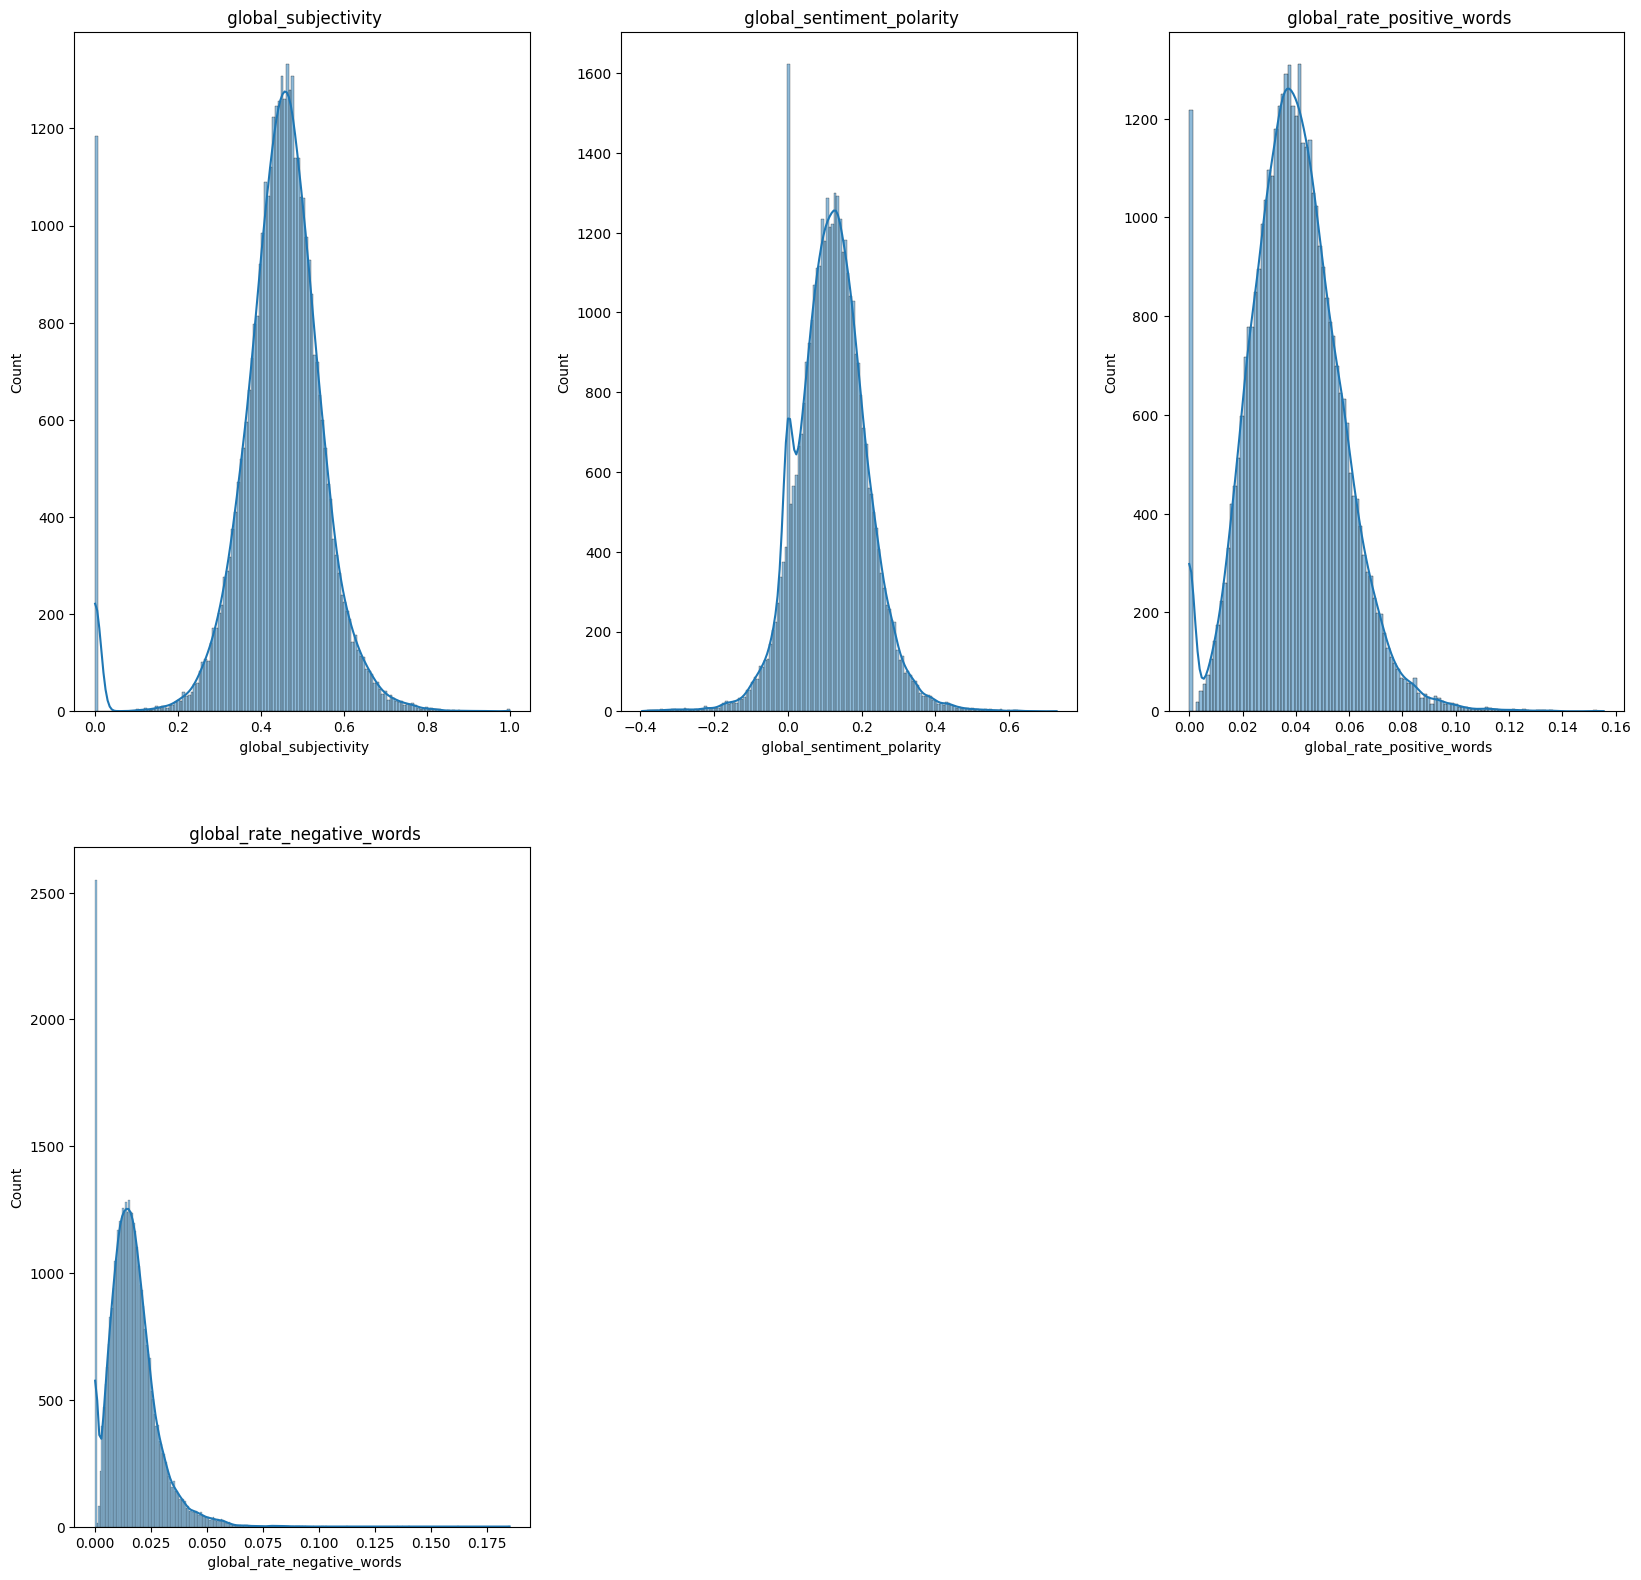

In [20]:
# - vedant
histplot(global_cols,df)

- **Global Subjectivity and Polarity:** Both "global_subjectivity" and "global_sentiment_polarity" have a roughly normal distribution centered around 0.5 and 0, respectively, suggesting that most articles are moderately subjective and have a neutral sentiment.

- **Positive vs. Negative Words:** The "global_rate_positive_words" variable has a distribution that peaks around 0.05, indicating that positive words are relatively frequent but not dominant in most articles.

- **Presence of Outliers:** There are a few extreme values (especially near 0) for all variables, indicating potential outliers or articles with unusually high or low sentiment scores.

**Number_cols**

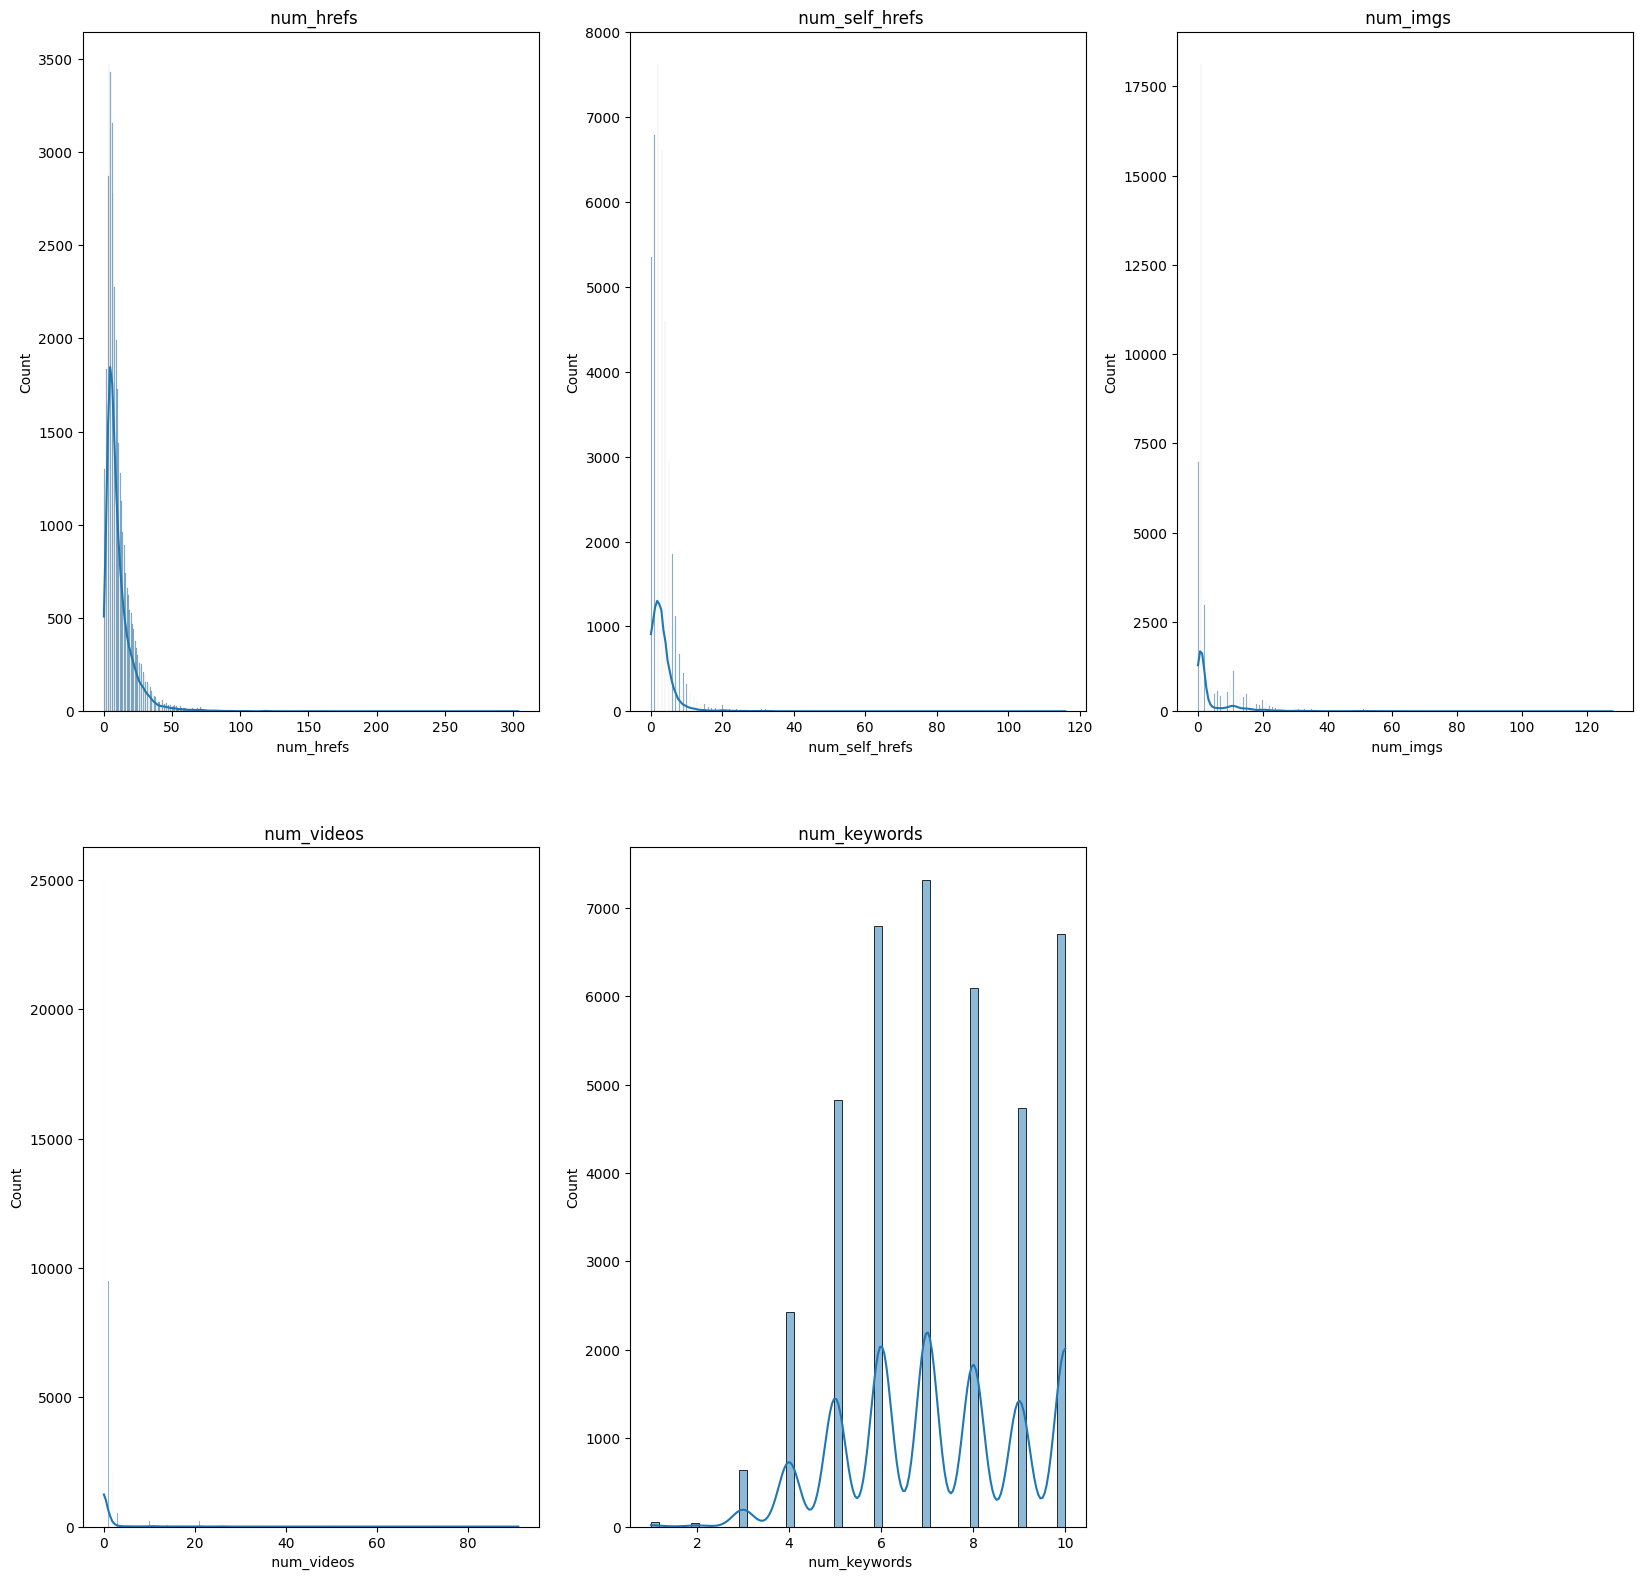

In [21]:
# - vedant
histplot(number_cols,df)

The histograms show that "num_hrefs," "num_self_hrefs," "num_imgs," and "num_videos" are heavily skewed to the right, indicating that most articles have very few of these elements, while only a few have a large number. In contrast, "num_keywords" is more evenly distributed, with peaks at different values, suggesting that articles typically contain a variety of keyword counts, usually ranging from 1 to 10.

**Rate_cols**

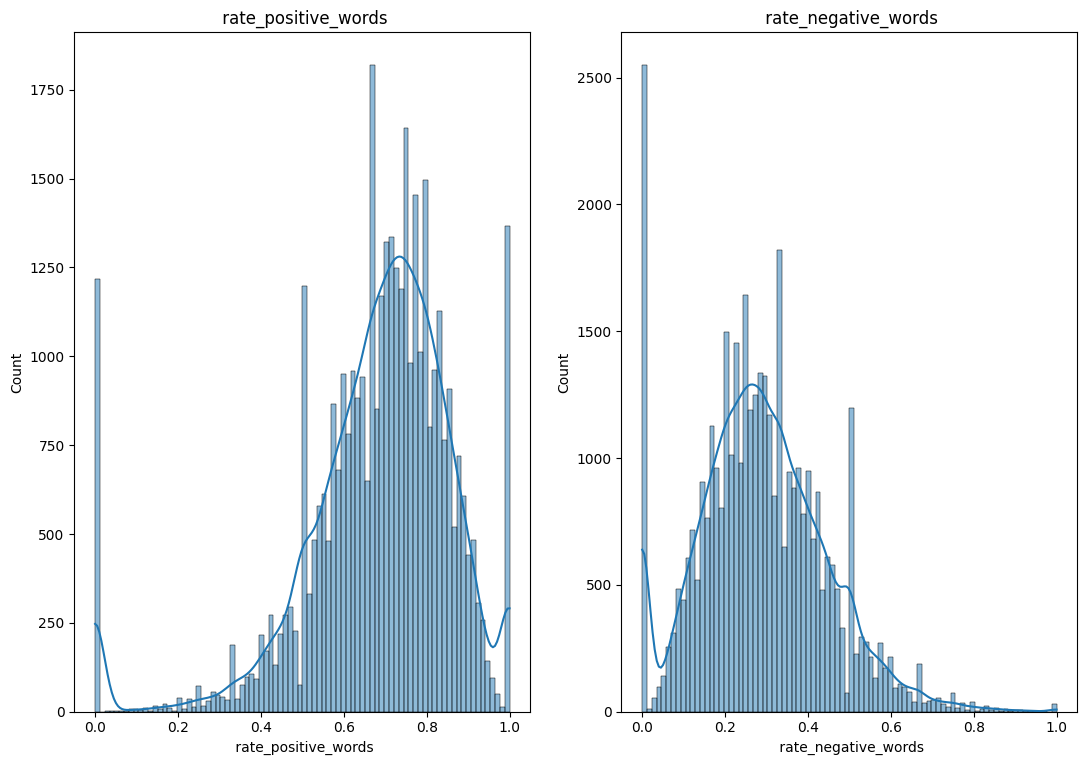

In [22]:
# - vedant
histplot(rate_cols,df)

The histograms for "rate_positive_words" and "rate_negative_words" shows that most articles have a moderate to high proportion of positive words (centered around 0.6-0.8), while the rate of negative words is skewed towards lower values, typically around 0.1-0.3. There are spikes at both extremes (0 and 1), indicating some articles are entirely positive or negative. This imbalance suggests that most articles lean towards a more positive tone, which might be important when predicting shares, as sentiment could influence an article's popularity.

**Polarity_cols**

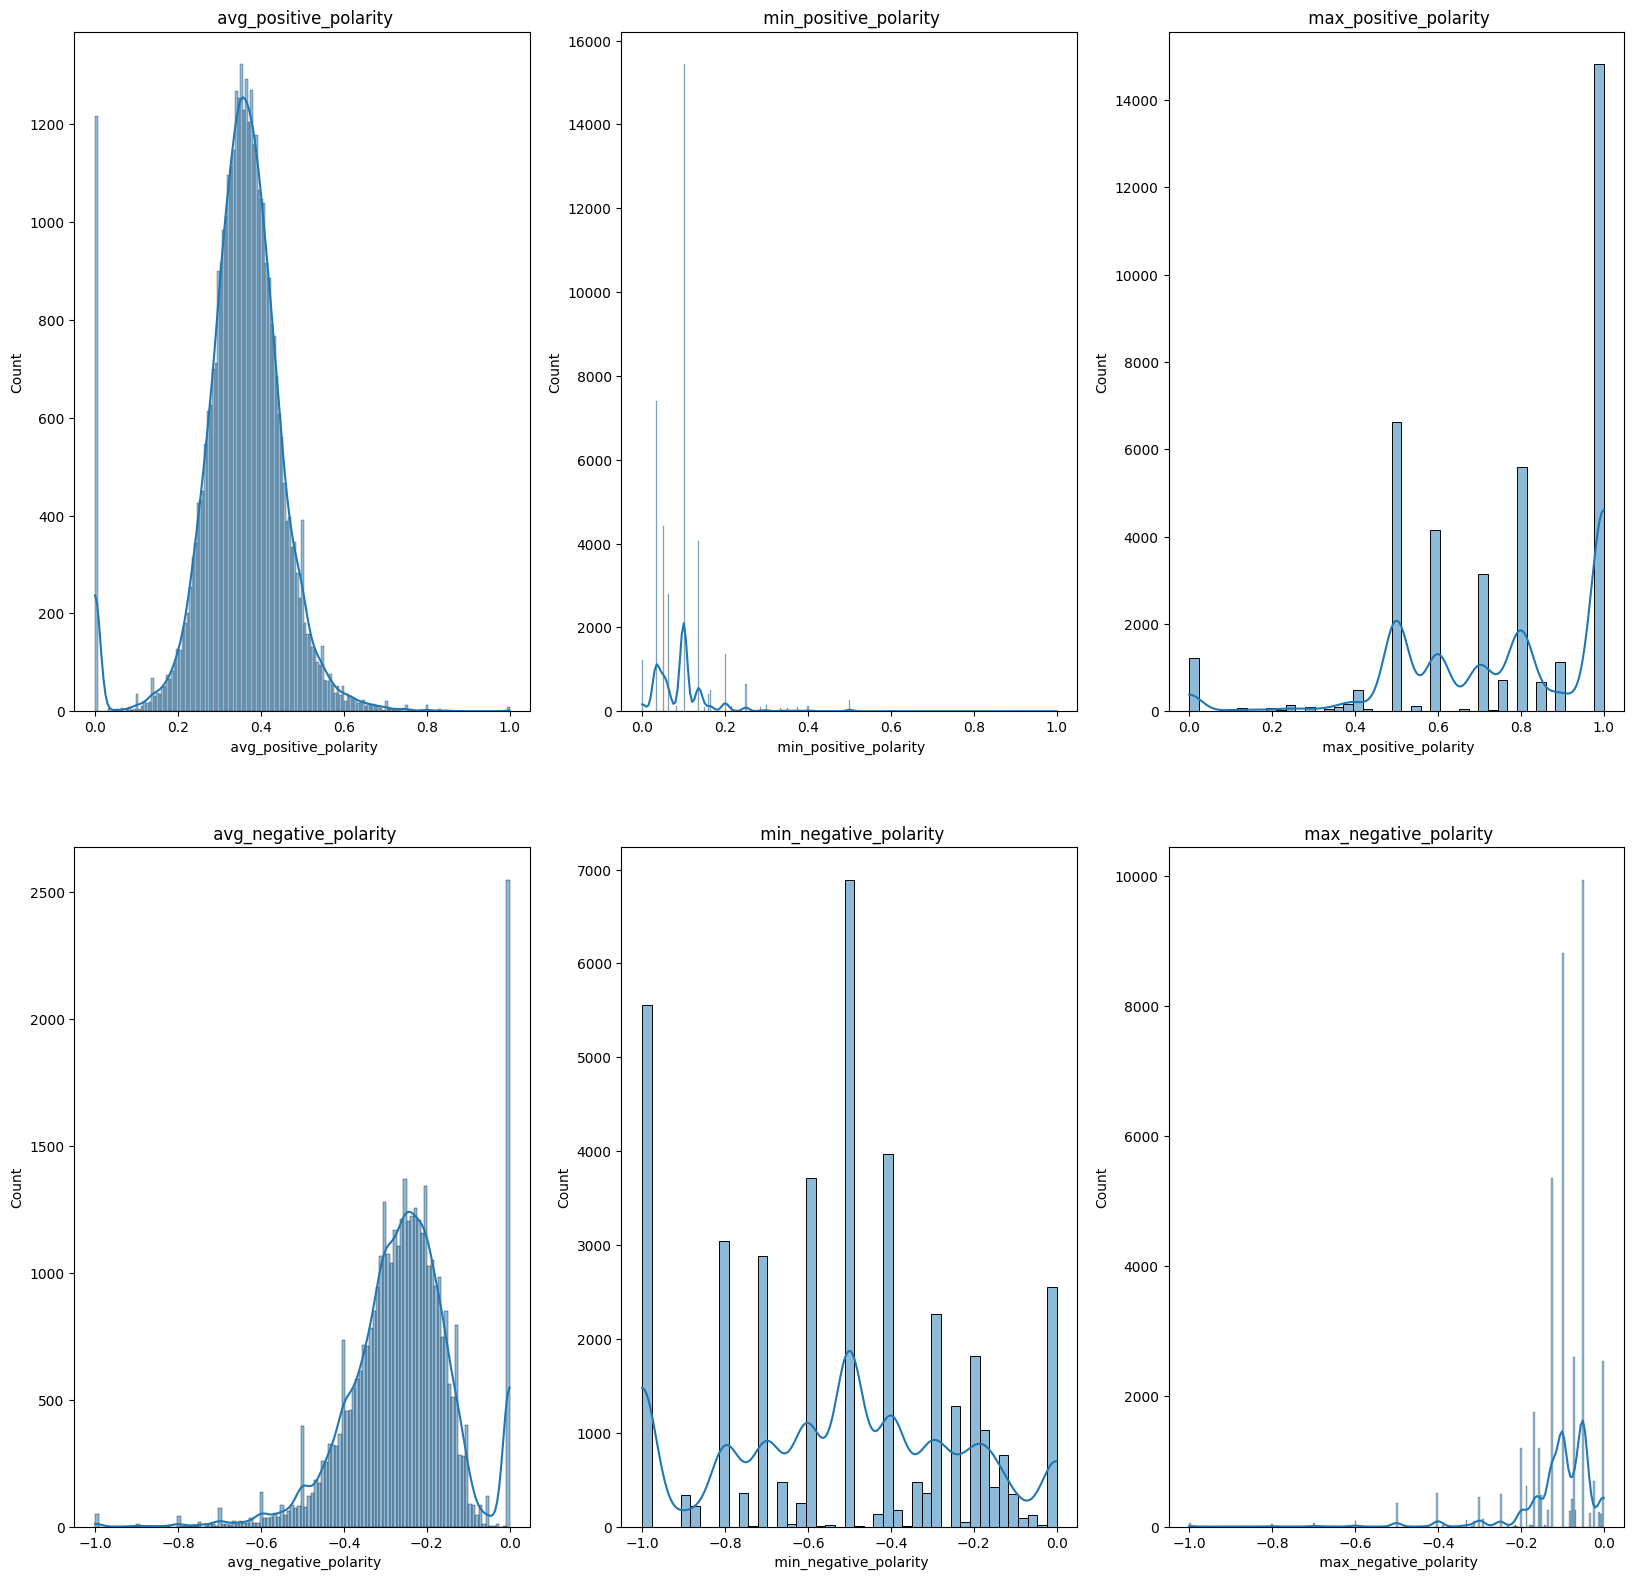

In [23]:
# - vedant
histplot(polarity_cols,df)

- The distributions show that "avg_positive_polarity" is centered around 0.4-0.6, indicating that most articles have a moderately positive tone on average. For "max_positive_polarity," there's a peak at 1.0, suggesting some articles have highly positive statements.
- In contrast, "avg_negative_polarity" skews towards -0.2 to -0.4, with fewer articles being extremely negative. The wide spread in "min_negative_polarity" and peaks in "max_positive_polarity" reflect variability in sentiment strength, indicating that articles contain a mix of sentiment tones, which could be significant in predicting shares.

**title_cols**

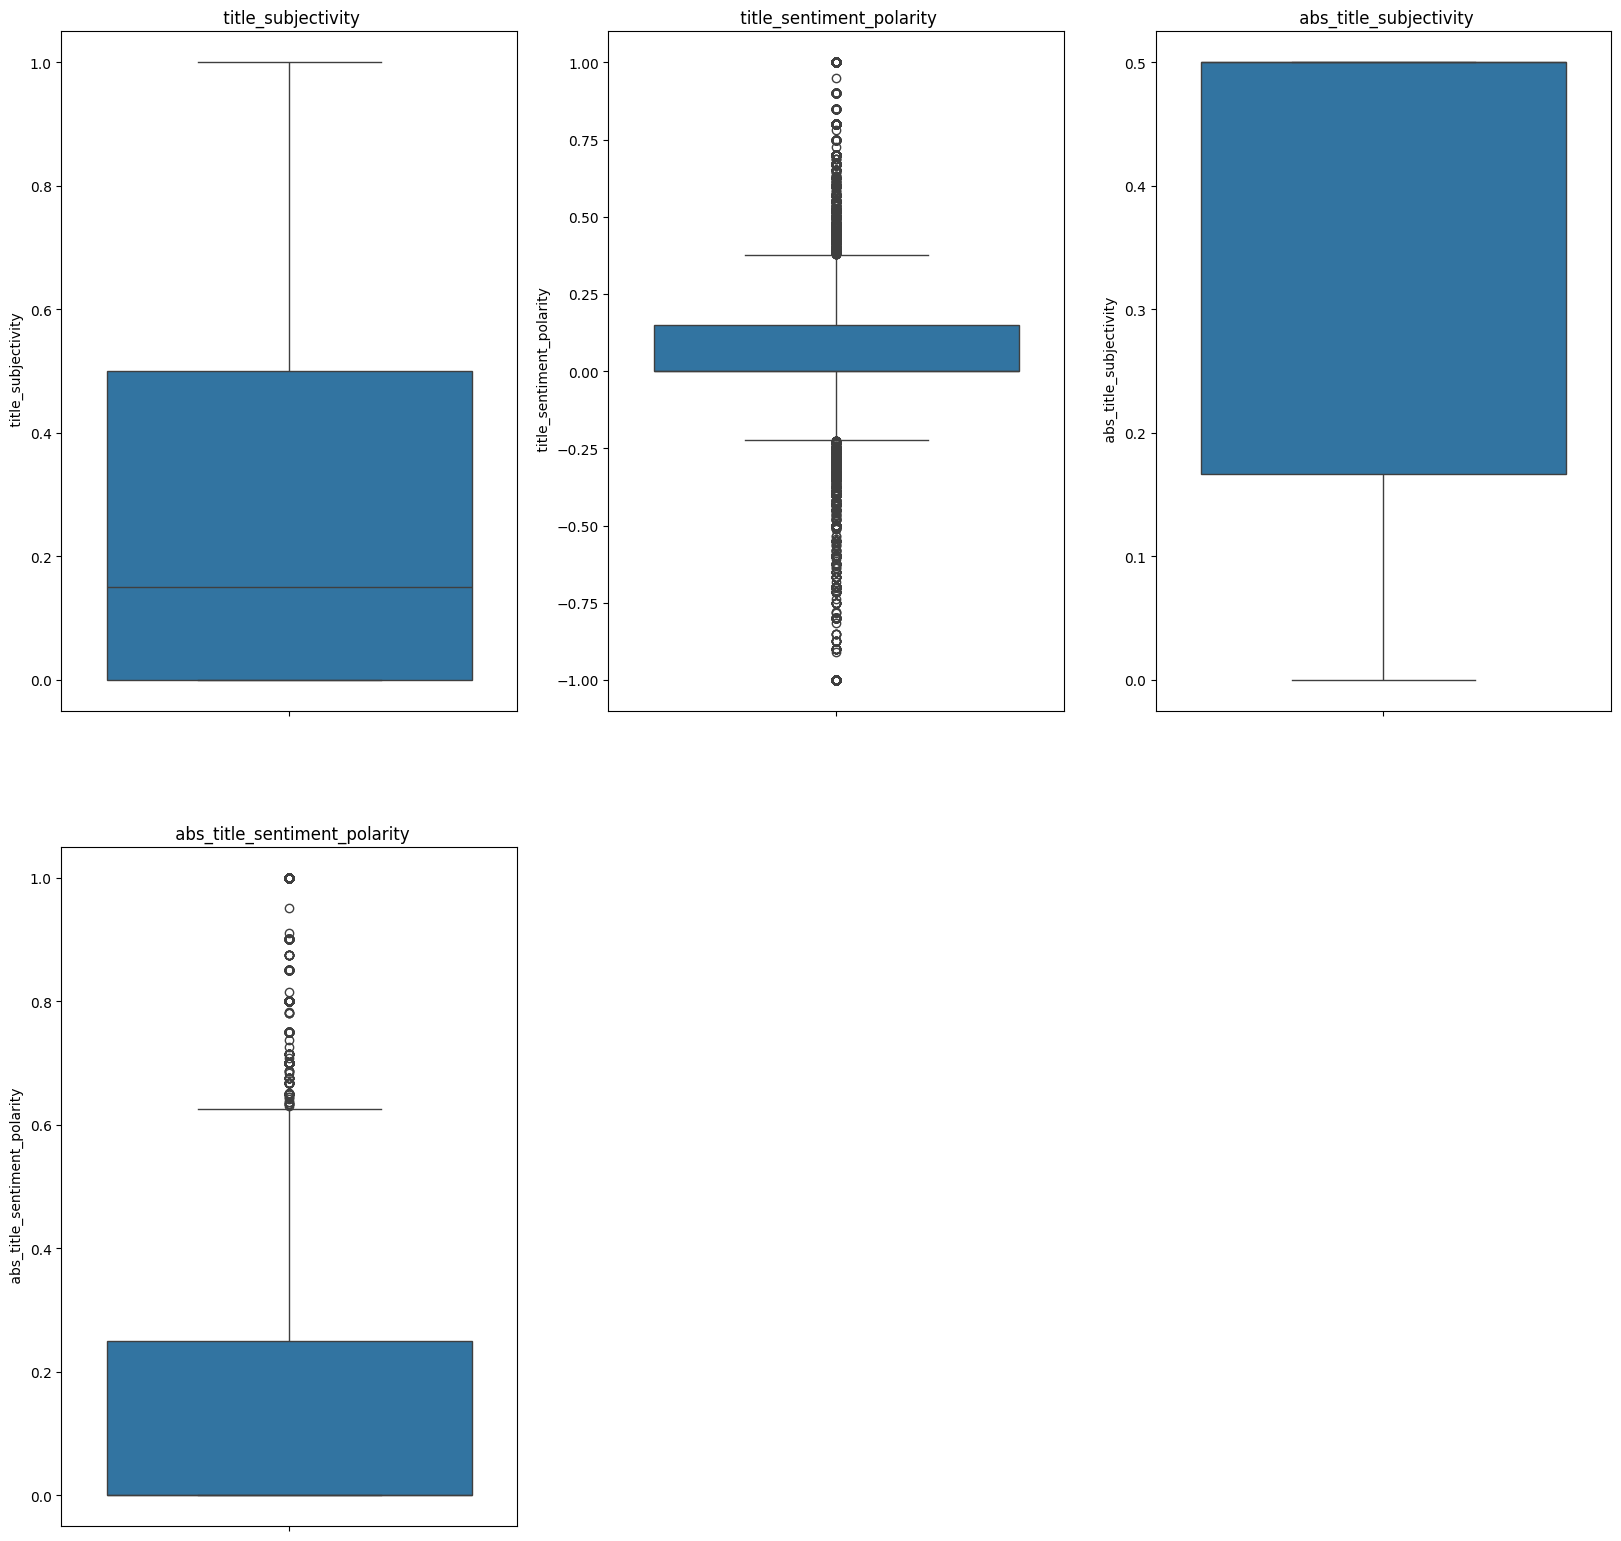

In [24]:
# - vedant
boxplot(title_cols,df)

The box plots shows that "title_subjectivity" and "title_sentiment_polarity" are mostly centered around neutral values, with "title_sentiment_polarity" having a median near 0. There are a significant number of outliers for both sentiment polarity measures, indicating that while most titles are neutral, some are either highly positive or negative. "abs_title_subjectivity" and "abs_title_sentiment_polarity" show a wider range of values, suggesting that the intensity of subjectivity and sentiment in article

In [25]:
# - vedant
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_

In [26]:
# List  categorical and numeric columns  - Meher

categorical_cols = [' data_channel_is_bus',' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world',' data_channel_is_lifestyle',  ' data_channel_is_entertainment'
                     ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
                     ' weekday_is_sunday', ' is_weekend']
print(f'Categorical Cols: {categorical_cols}')

Categorical Cols: [' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' data_channel_is_lifestyle', ' data_channel_is_entertainment weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend']


In [27]:
#  - Meher
numeric_cols = [col for col in df.columns if col not in categorical_cols]
print(f'Numerical Col:{numeric_cols}')

Numerical Col:[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_entertainment', ' kw_min_min', ' kw_max_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity', ' shares']


In [28]:
#  - Meher
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99])

n_tokens_title   n_tokens_content   n_unique_tokens     num_hrefs  \
count     39644.000000       39644.000000      39644.000000  39644.000000   
mean         10.398749         546.514731          0.548216     10.883690   
std           2.114037         471.107508          3.520708     11.332017   
min           2.000000           0.000000          0.000000      0.000000   
1%            6.000000           0.000000          0.000000      0.000000   
5%            7.000000         105.000000          0.349070      1.000000   
10%           8.000000         152.000000          0.406378      2.000000   
25%           9.000000         246.000000          0.470870      4.000000   
50%          10.000000         409.000000          0.539226      8.000000   
75%          12.000000         716.000000          0.608696     14.000000   
80%          12.000000         810.000000          0.626335     16.000000   
90%          13.000000        1090.000000          0.676714     23.000000   
95%          14.000000        1407.000000          0.720908     30.000000   
99%          15.000000        2256.140000          0.802407     56.000000   
max          23.000000        8474.000000        701.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
1%            0.000000      0.000000      0.000000               0.000000   
5%            0.000000      0.000000      0.000000               4.156480   
10%           0.000000      0.000000      0.000000               4.302621   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
80%           5.000000      8.000000      1.000000               4.904110   
90%           6.000000     14.000000      2.000000               5.036971   
95%           9.000000     20.000000      6.000000               5.153332   
99%          20.000000     37.000000     21.000000               5.444530   
max         116.000000    128.000000     91.000000               8.041534   

        num_keywords   data_channel_is_lifestyle  ...   min_positive_polarity  \
count   39644.000000                39644.000000  ...            39644.000000   
mean        7.223767                    0.052946  ...                0.095446   
std         1.909130                    0.223929  ...                0.071315   
min         1.000000                    0.000000  ...                0.000000   
1%          3.000000                    0.000000  ...                0.000000   
5%          4.000000                    0.000000  ...                0.033333   
10%         5.000000                    0.000000  ...                0.033333   
25%         6.000000                    0.000000  ...                0.050000   
50%         7.000000                    0.000000  ...                0.100000   
75%         9.000000                    0.000000  ...                0.100000   
80%         9.000000                    0.000000  ...                0.136364   
90%        10.000000                    0.000000  ...                0.160000   
95%        10.000000                    1.000000  ...                0.200000   
99%        10.000000                    1.000000  ...                0.400000   
max        10.000000                    1.000000  ...                1.000000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.756728               -0.259524               -0.521944   
st

In [29]:
# - Meher
df.shape

(39644, 56)

## **Filtering the dataset**

In [30]:
# Removing outliers below 25th and above 75th percentile  - Meher
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # finding the outliers
    outliers = df[(df[col] < range_low) | (df[col] > range_high)]

outliers.shape

(4541, 56)

In [31]:
# filtering the outliers and creating new filtered dataframe(data) - Meher
data = df[~df.isin(outliers)]

In [32]:
# - Meher
data.shape

(39644, 56)

In [33]:
#  - Meher
data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99])

n_tokens_title   n_tokens_content   n_unique_tokens     num_hrefs  \
count     35103.000000       35103.000000      35103.000000  35103.000000   
mean         10.402330         546.791699          0.531275     10.584423   
std           2.108118         462.714379          0.134254     10.771551   
min           2.000000           0.000000          0.000000      0.000000   
1%            6.000000           0.000000          0.000000      0.000000   
5%            7.000000         107.000000          0.355619      1.000000   
10%           8.000000         155.000000          0.409014      2.000000   
25%           9.000000         250.000000          0.471815      4.000000   
50%          10.000000         414.000000          0.538721      7.000000   
75%          12.000000         715.000000          0.607018     13.000000   
80%          12.000000         808.000000          0.625000     15.000000   
90%          13.000000        1082.000000          0.674847     22.000000   
95%          14.000000        1393.000000          0.719740     30.000000   
99%          15.000000        2231.000000          0.804113     54.000000   
max          20.000000        7764.000000          1.000000    187.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     35103.000000  35103.000000  35103.000000           35103.000000   
mean          3.297126      4.335840      1.187762               4.560363   
std           3.847926      8.091522      3.962538               0.817241   
min           0.000000      0.000000      0.000000               0.000000   
1%            0.000000      0.000000      0.000000               0.000000   
5%            0.000000      0.000000      0.000000               4.166683   
10%           0.000000      0.000000      0.000000               4.308642   
25%           1.000000      1.000000      0.000000               4.481877   
50%           3.000000      1.000000      0.000000               4.668421   
75%           4.000000      3.000000      1.000000               4.858998   
80%           5.000000      7.000000      1.000000               4.907472   
90%           6.000000     13.000000      2.000000               5.038339   
95%           9.000000     20.000000      5.000000               5.151366   
99%          20.000000     36.000000     21.000000               5.433264   
max         116.000000    128.000000     75.000000               8.041534   

        num_keywords   data_channel_is_lifestyle  ...   min_positive_polarity  \
count   35103.000000                35103.000000  ...            35103.000000   
mean        7.199385                    0.051221  ...                0.095213   
std         1.916833                    0.220451  ...                0.070615   
min         1.000000                    0.000000  ...                0.000000   
1%          3.000000                    0.000000  ...                0.000000   
5%          4.000000                    0.000000  ...                0.033333   
10%         5.000000                    0.000000  ...                0.033333   
25%         6.000000                    0.000000  ...                0.050000   
50%         7.000000                    0.000000  ...                0.100000   
75%         9.000000                    0.000000  ...                0.100000   
80%         9.000000                    0.000000  ...                0.136364   
90%        10.000000                    0.000000  ...                0.160000   
95%        10.000000                    1.000000  ...                0.200000   
99%        10.000000                    1.000000  ...                0.400000   
max        10.000000                    1.000000  ...                1.000000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
count            35103.000000            35103.000000            35103.000000   
mean                 0.755122               -0.257774               -0.519271   
st

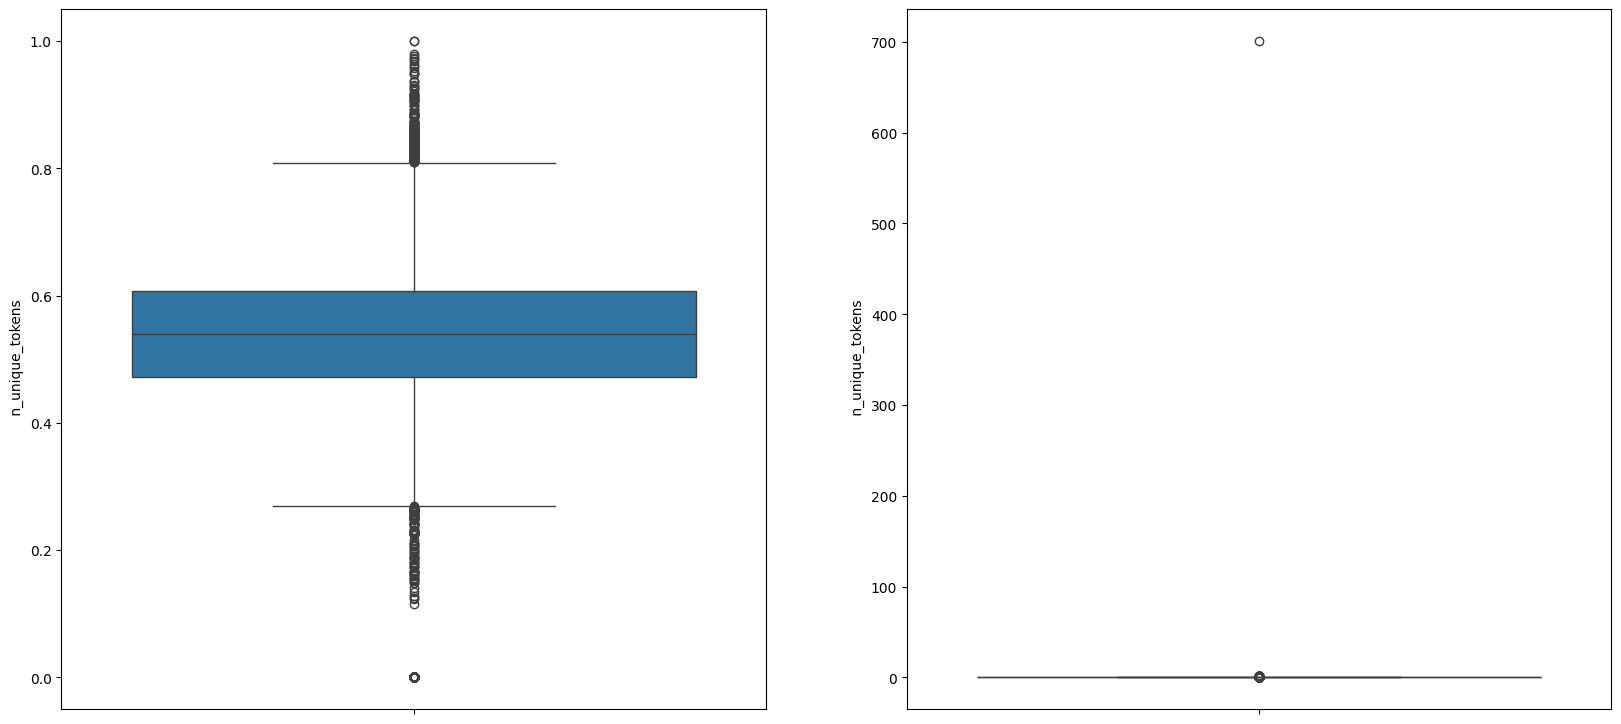

In [34]:
# Checking the Removal of Outliers  - Meher
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(data[' n_unique_tokens'])
plt.subplot(2,2,2)
sns.boxplot(df[' n_unique_tokens'])
plt.show()

we can see thet the boxplot on the left shows the normalised version after treating the outliers

### **Deleting the outlier value '0' for normal distribution**

**'avg_positive_polarity'**

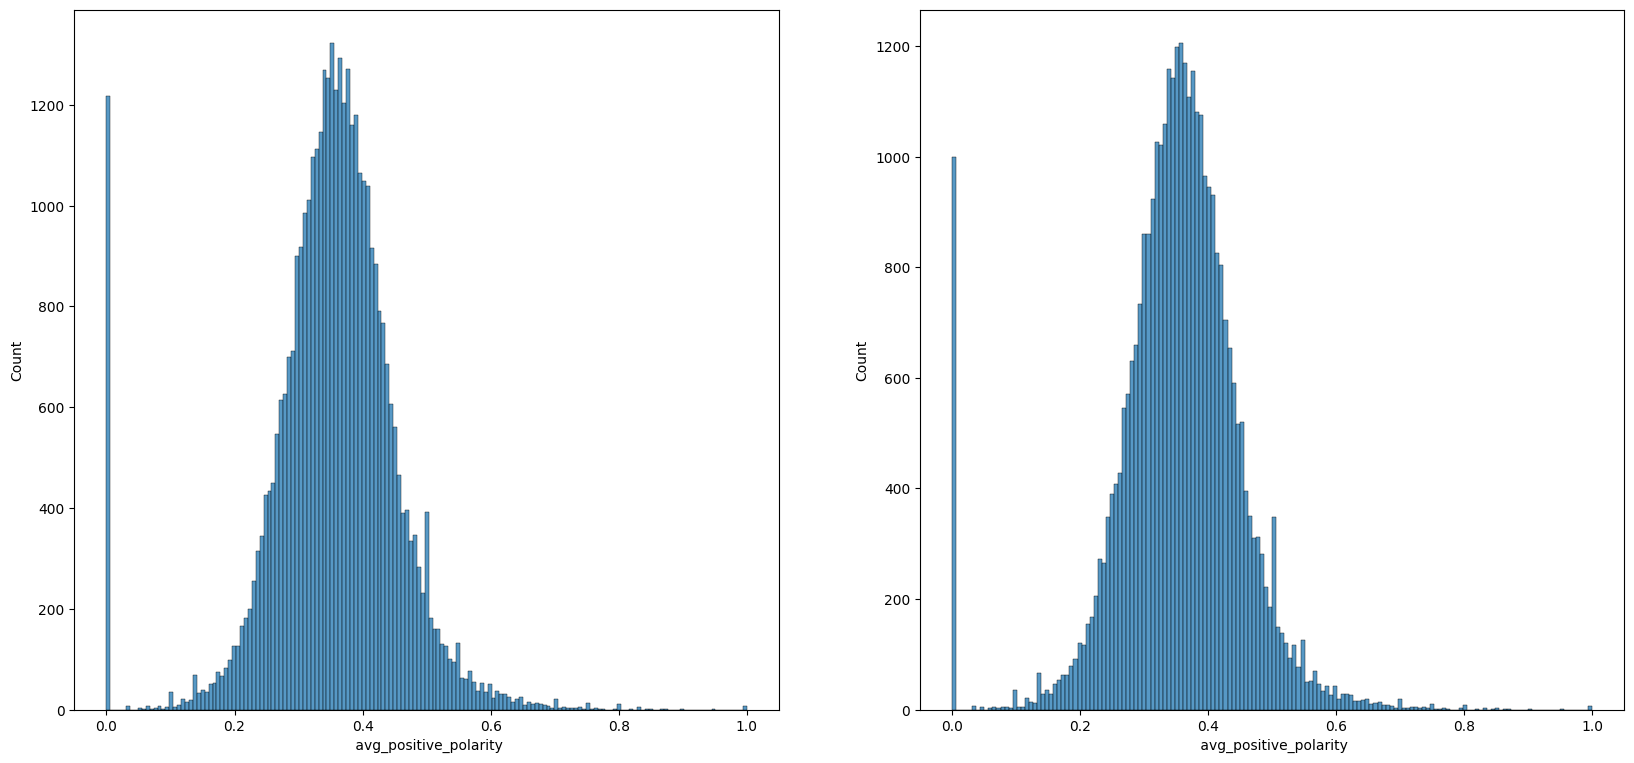

In [35]:
# -Sainath
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.histplot(df[' avg_positive_polarity'])
plt.subplot(2,2,2)
sns.histplot(data[' avg_positive_polarity'])
plt.show()

"avg_positive_polarity" show a bell-shaped distribution centered around 0.4 to 0.5, indicating that most articles tend to have a moderately positive tone. The spike at 0 suggests that there are quite a few articles with a completely neutral or non-positive tone. This variation in positive polarity suggests that sentiment may play a role in predicting shares, with a general tendency towards moderate positivity in most articles.

In [36]:
# Relapcing 0 with null and checking the percentage of null values, removing it if required  -Sainath
data[' avg_positive_polarity'].replace(0,np.nan,inplace=True)


In [37]:
# -Sainath
data[' avg_positive_polarity'].isnull().sum()/data.shape[0]*100

13.974371909998991

<Axes: xlabel=' avg_positive_polarity', ylabel='Count'>

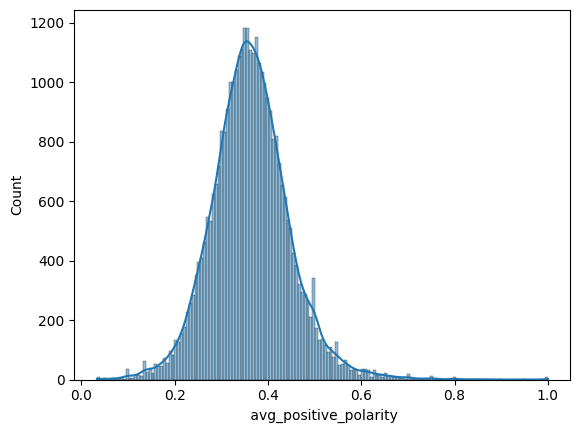

In [38]:
# -Sainath
data = data.dropna(subset=[' avg_positive_polarity'])
sns.histplot(data[' avg_positive_polarity'],kde= True)

 The distribution tails off toward both extremes, suggesting fewer articles with very high or very low positive polarity. This suggests that, overall, articles maintain a balanced, slightly positive tone, which might be influential in predicting engagement or shares.

In [39]:
# -Sainath
data[' avg_positive_polarity'].isnull().sum()

0

In [40]:
# -Sainath
data.shape

(34104, 56)

**global cols**

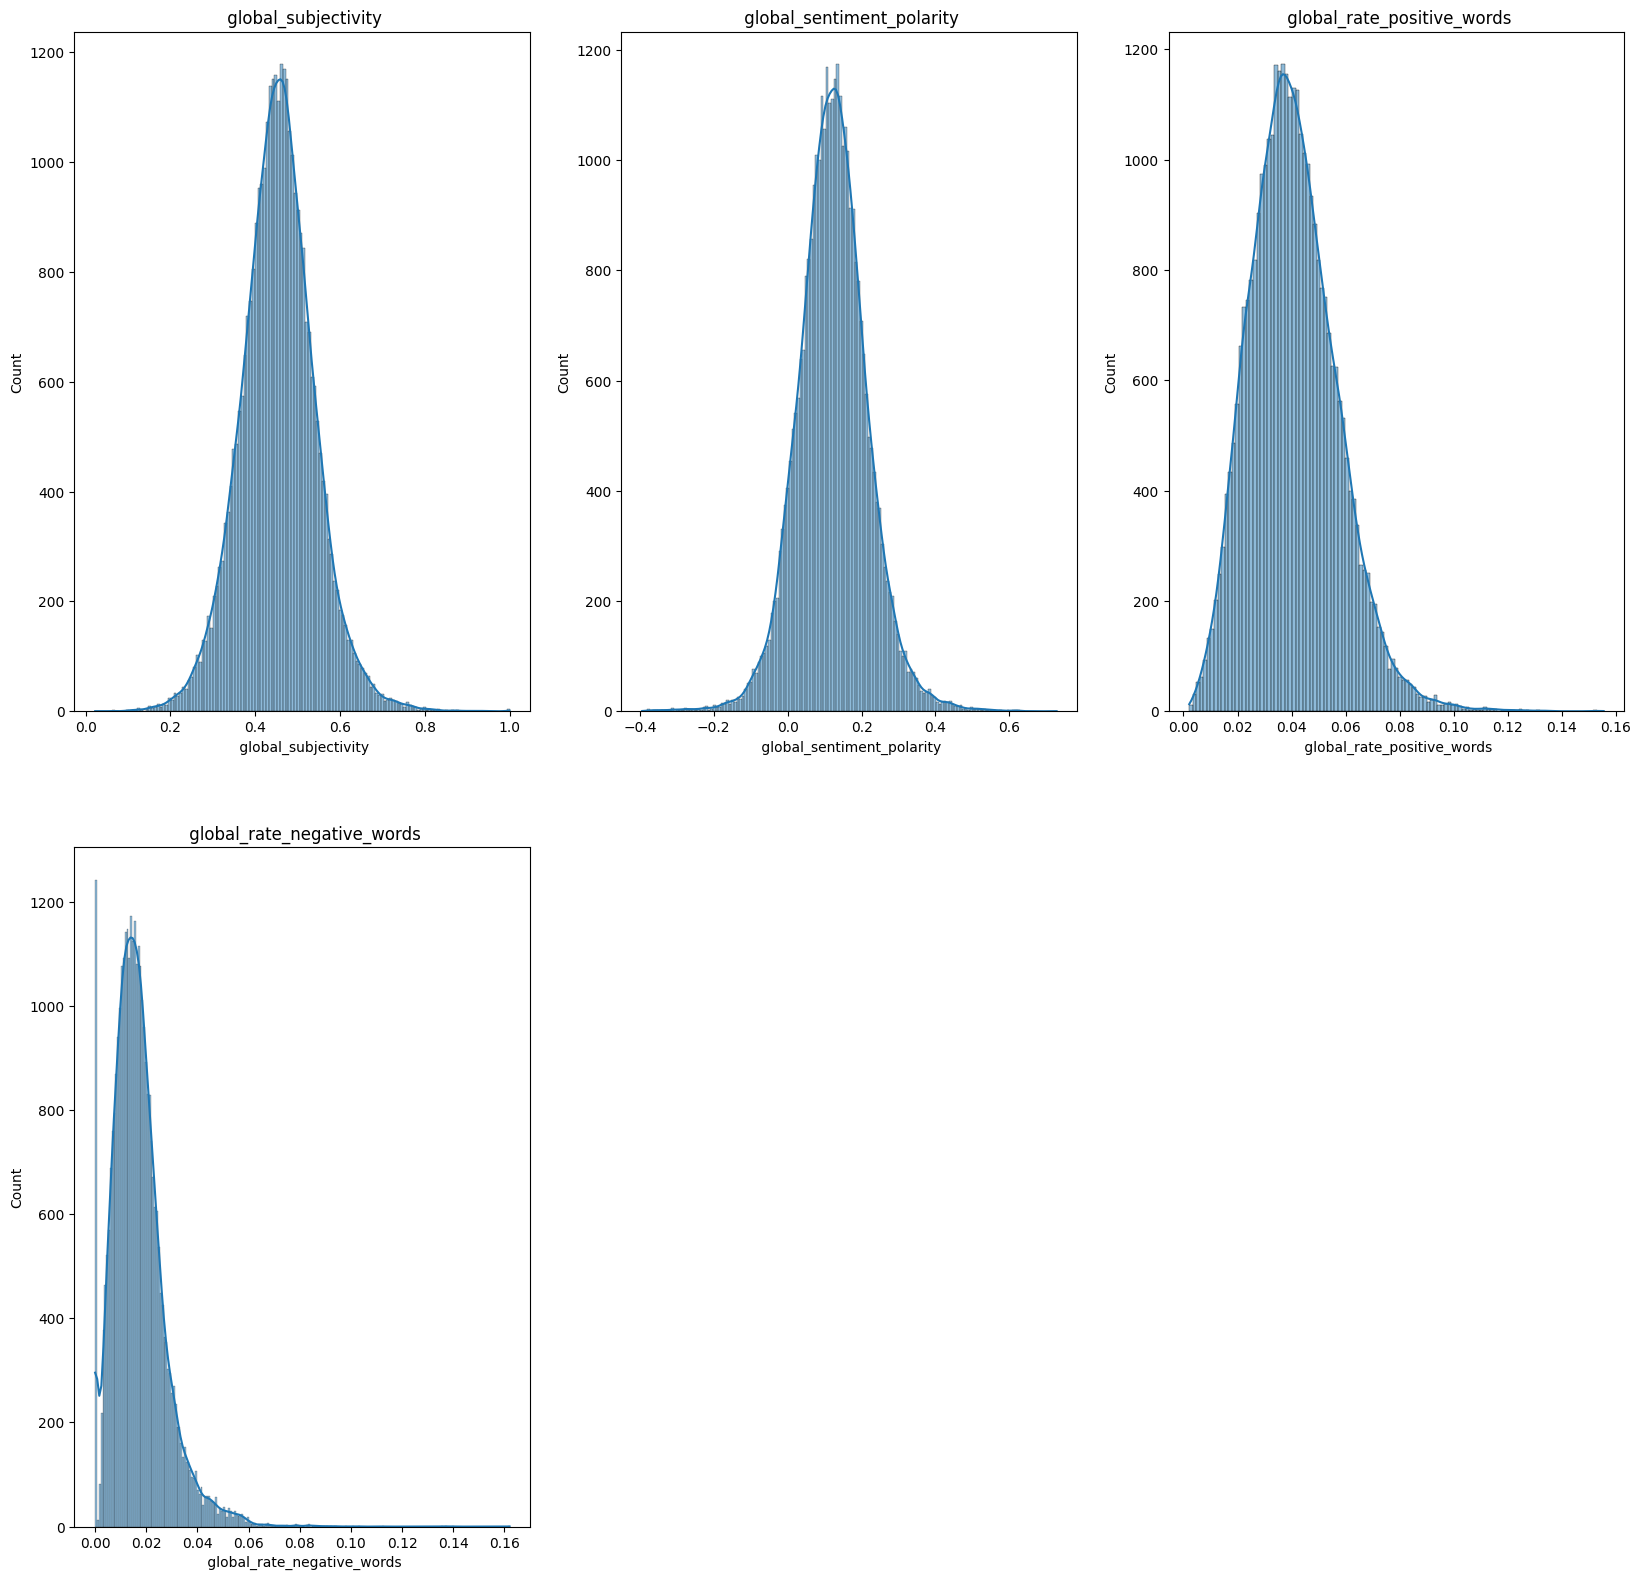

In [41]:
# -Sainath
histplot(global_cols,data)

The histograms for "global_subjectivity," "global_sentiment_polarity," and "global_rate_positive_words" are all bell-shaped and centered around moderate values, indicating that most articles maintain a balanced tone in terms of subjectivity and sentiment. However, "global_rate_negative_words" is skewed toward lower values, suggesting that negative words are used less frequently. This overall tendency toward moderate positivity and subjectivity might reflect the writing style of articles aiming to be engaging yet neutral.

In [42]:
# -Sainath
data[' global_rate_negative_words'].replace(0,np.nan,inplace=True)

In [43]:
# -Sainath
data[' global_rate_negative_words'].isnull().sum()

1241

In [44]:
# -Sainath
data[' global_rate_negative_words'].isnull().sum()/data.shape[0]*100

3.6388693408397845

In [45]:
# -Sainath
data = data.dropna(subset=[' global_rate_negative_words'])

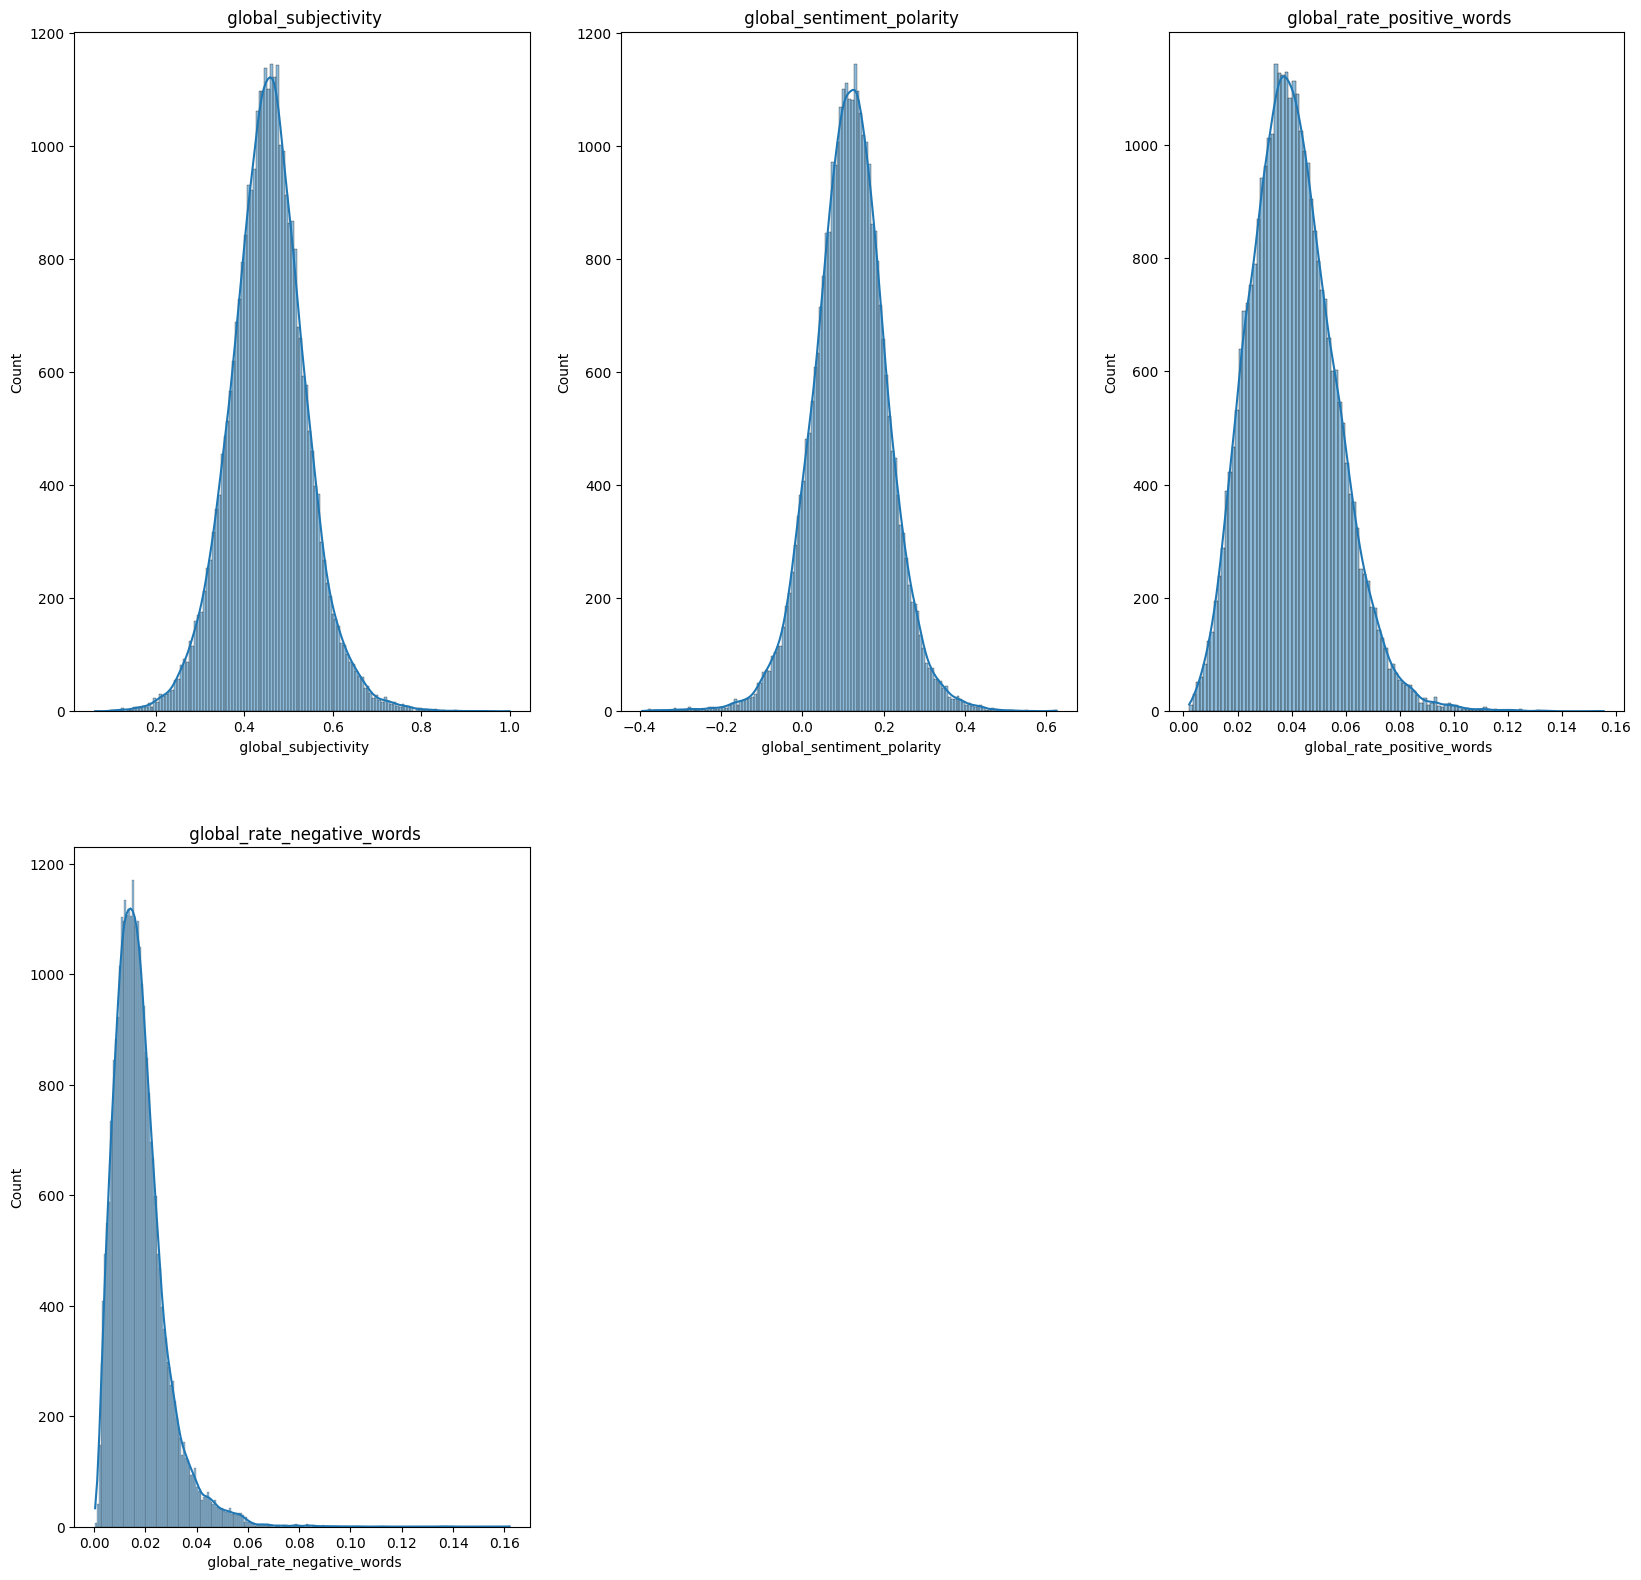

In [46]:
# -Sainath
histplot(global_cols,data)

 In contrast, "global_rate_negative_words" is skewed towards lower values, indicating that negative words are much less frequent. This suggests that articles generally lean towards a neutral to positive sentiment, which might influence reader engagement and shares.

In [47]:
# -Sainath
data[' global_rate_negative_words'].isnull().sum()

0

In [48]:
# -Sainath
data.shape

(32863, 56)

**rate cols**

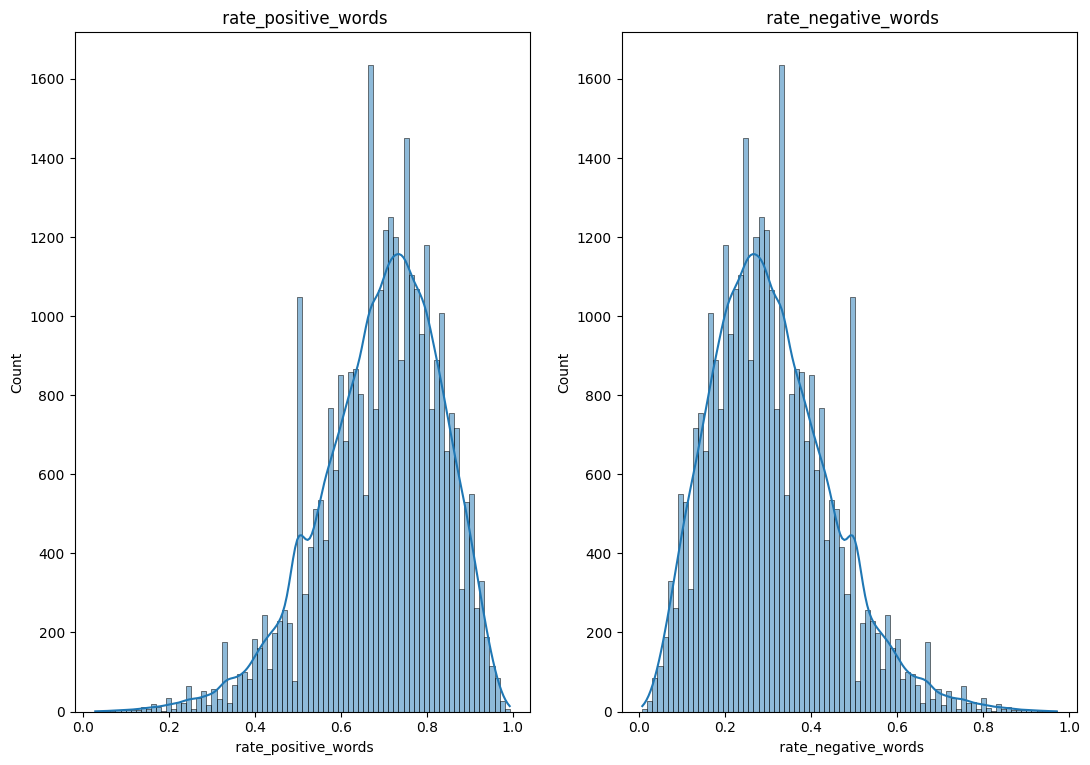

In [49]:
# -Sainath
histplot(rate_cols,data)

The distributions for "rate_positive_words" and "rate_negative_words" are quite similar, showing bell-shaped curves centered around 0.5. This suggests that most articles contain a balanced mix of positive and negative words, with a slight tendency towards more positive words. There are peaks at the extremes (close to 0 and 1), indicating some articles are either overwhelmingly positive or negative, which could be important in understanding article engagement or shares

**polarity_cols**

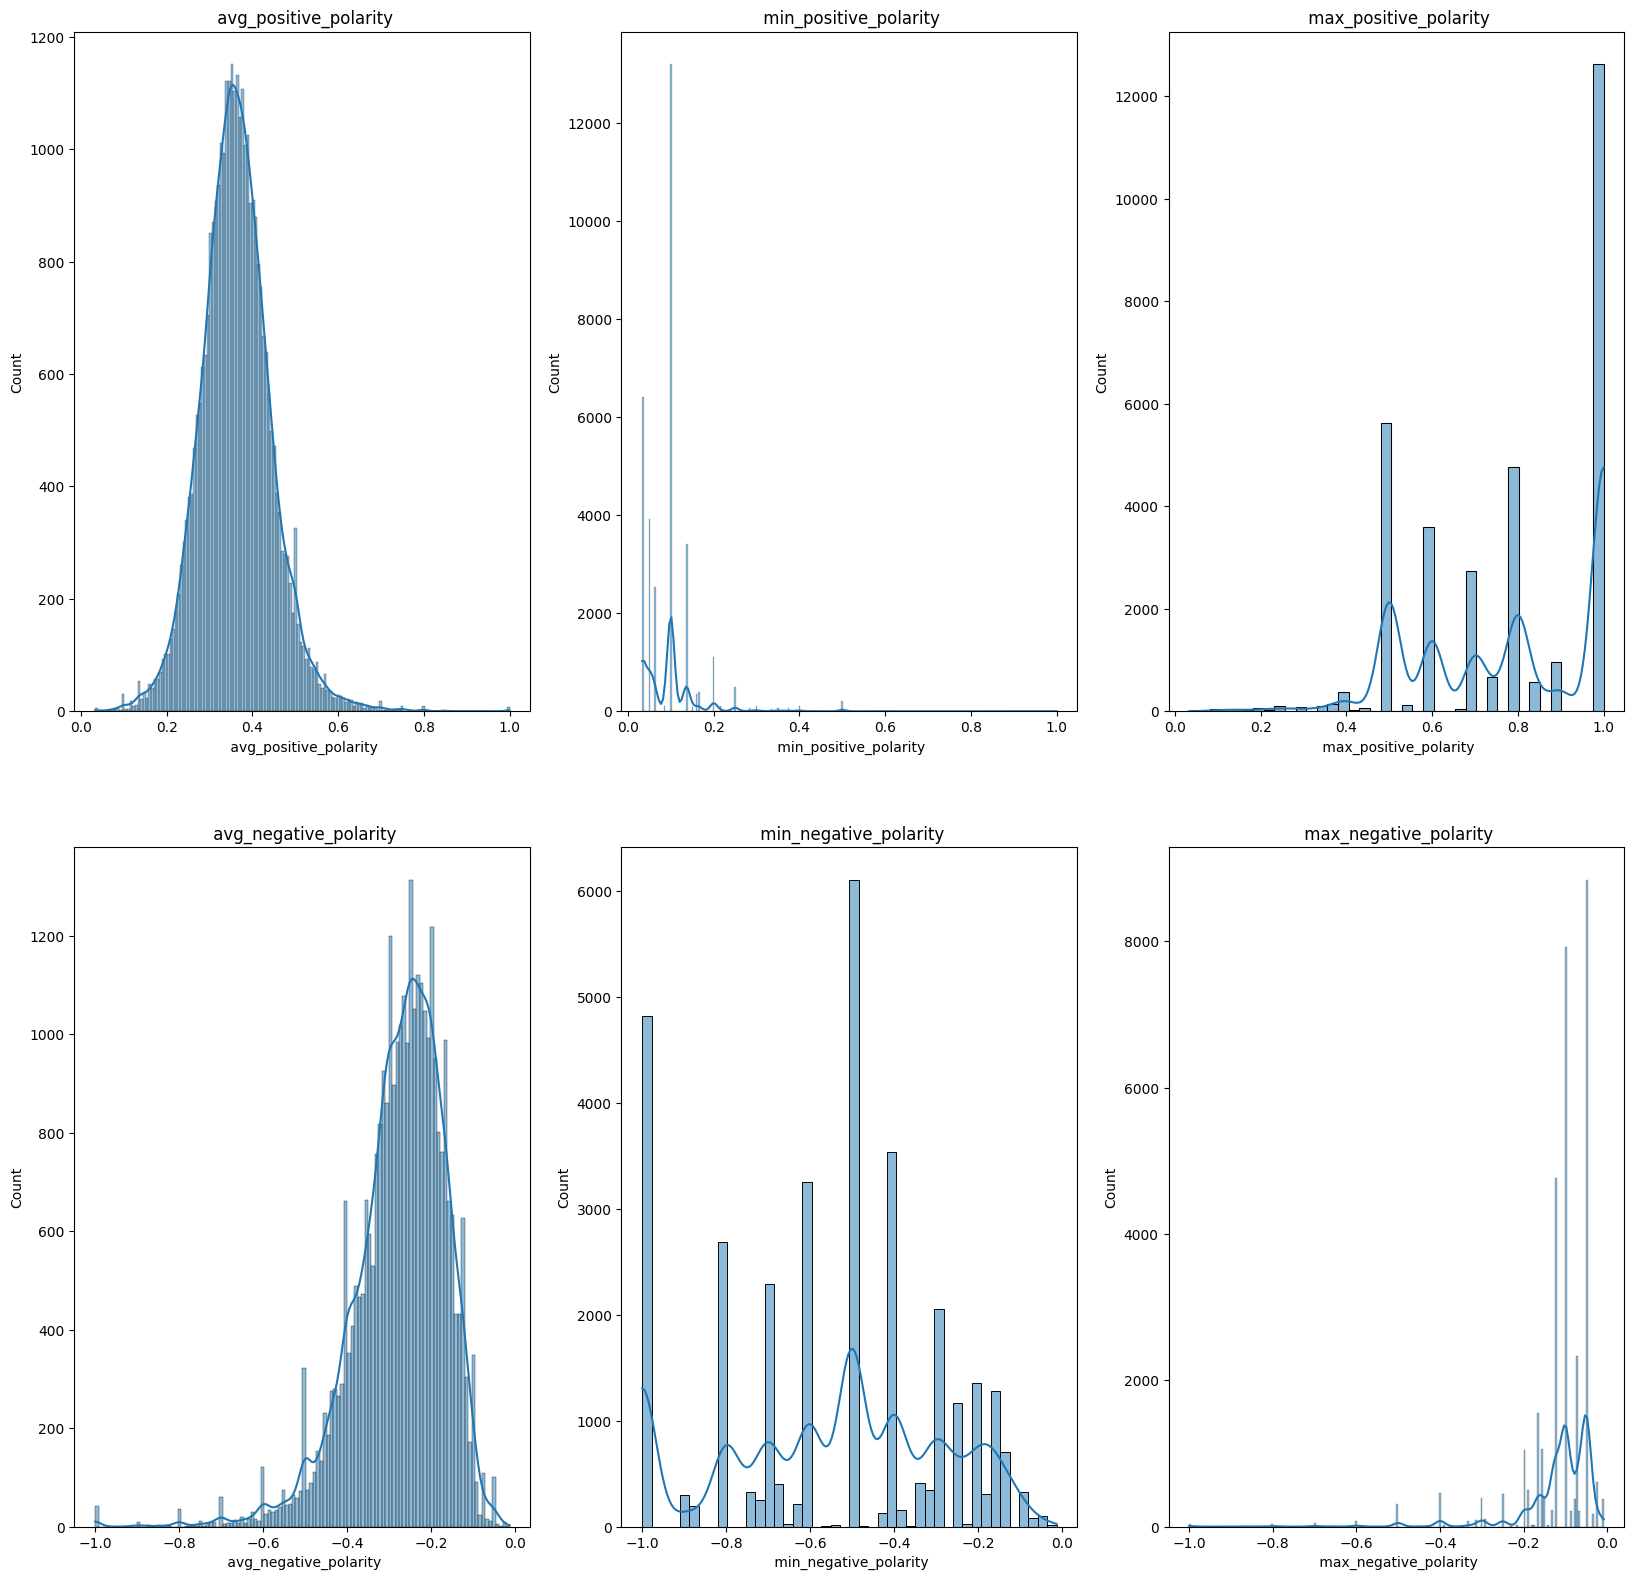

In [50]:
# -Sainath
histplot(polarity_cols,data)

The distributions show that "avg_positive_polarity" is centered around 0.4-0.6, indicating that articles tend to have a moderately positive tone. The "max_positive_polarity" has spikes at 1.0, suggesting some articles contain highly positive statements. Conversely, "avg_negative_polarity" peaks around -0.2 to -0.4, with fewer cases being extremely negative. The scattered distribution of "min_negative_polarity" indicates variability in negative sentiment intensity.

# **EDA on "data" dataset**

In [51]:
# - Vedant
corr_with_target = data.corr()[' shares'].sort_values(ascending=False)
corr_with_target.head(10)

shares                    1.000000
 kw_avg_avg                0.148480
 is_weekend                0.139606
 data_channel_is_socmed    0.116481
 data_channel_is_tech      0.102752
 weekday_is_saturday       0.101514
 global_subjectivity       0.094246
 LDA_04                    0.093186
 weekday_is_sunday         0.089417
 kw_min_avg                0.087692
Name:  shares, dtype: float64

In [52]:
# - Vedant
corr_with_target.tail(10)

weekday_is_tuesday              -0.038914
 weekday_is_wednesday            -0.039890
 n_tokens_title                  -0.041364
 average_token_length            -0.045668
 n_unique_tokens                 -0.053079
 rate_negative_words             -0.079507
 LDA_01                          -0.079970
 data_channel_is_entertainment   -0.105770
 LDA_02                          -0.141682
 data_channel_is_world           -0.142568
Name:  shares, dtype: float64

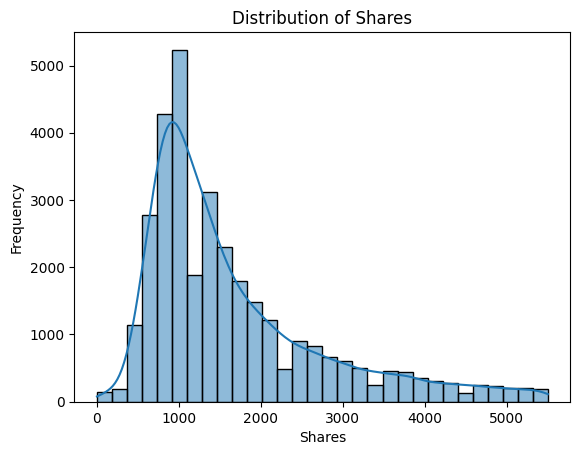

In [53]:
#Histogram of the target variable 'shares' # - Vedant
sns.histplot(data[' shares'], bins=30,edgecolor='black',kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

The distribution of shares is right-skewed, with most articles receiving between 500 to 1500 shares. There are fewer articles with very high shares, indicating that viral content is relatively rare.

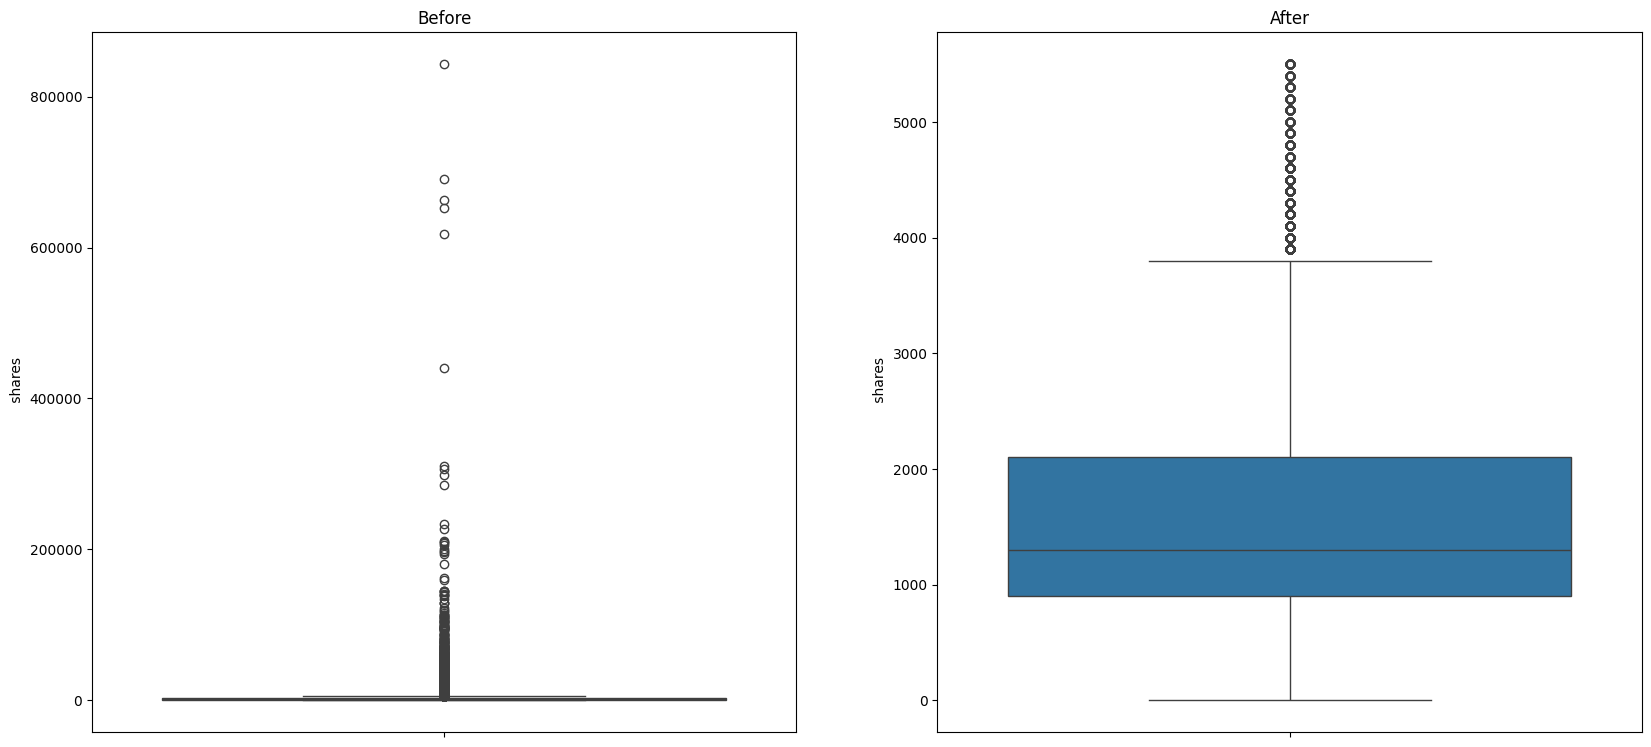

In [54]:
# visualization before and after treating outliers # - Vedant
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df[' shares'])
plt.title('Before')
plt.subplot(2,2,2)
sns.boxplot(data[' shares'])
plt.title('After')
plt.show()


The "Before" box plot shows extreme outliers in the shares, with some articles reaching over 800,000 shares, which could skew the analysis. After handling these outliers (likely through capping or filtering), the "After" box plot presents a more condensed and realistic distribution, making the data more suitable for modeling and improving prediction accuracy.

# **RFE**

In [55]:
# - Sainath
X = data.drop(' shares',axis=1)
y = data[' shares']

In [56]:
# Spliting the data into test and train- Sainath
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .7, random_state=42)

In [57]:
#  Doing RFE- Sainath
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [58]:
#- Sainath
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' rate_positive_words',
       ' rate_negative_words'],
      dtype='object')


In [59]:
#- Sainath
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

In [60]:
#- Sainath
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

In [61]:
#- Sainath
mse_rfe = mean_squared_error(y_test, y_pred)
r2_rfe = r2_score(y_test, y_pred)

In [62]:
#- Sainath
print(f"RFE Model - Mean Squared Error: {mse_rfe}")
print(f"RFE Model - R^2 Score: {r2_rfe}")

RFE Model - Mean Squared Error: 1156207.8438989755
RFE Model - R^2 Score: 0.027927155961574246


# **PCA**

In [63]:
# - Vedant
x_scaled = StandardScaler().fit_transform(X)

In [64]:
# - Vedant
pca = PCA(n_components=10)
x_pca = pca.fit_transform(x_scaled)

In [65]:
# Explained variance by each component  - Vedant
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())

Explained Variance Ratio: [0.08466593 0.07341348 0.06008917 0.05124171 0.04681401 0.04041863
 0.03930467 0.03778232 0.03652287 0.0349181 ]
Cumulative Explained Variance: [0.08466593 0.15807942 0.21816859 0.26941029 0.3162243  0.35664293
 0.3959476  0.43372992 0.47025279 0.50517089]


In [66]:
# - Vedant
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.3, random_state=42)

# Train a linear regression model on PCA-transformed data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

In [67]:
# Evaluate model performance  - Vedant
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)
print(f"PCA Model - Mean Squared Error: {mse_pca}")
print(f"PCA Model - R^2 Score: {r2_pca}")

PCA Model - Mean Squared Error: 1100436.142548095
PCA Model - R^2 Score: 0.07481678453059581


# **Conclusion**

- Both the RFE and PCA models didn’t perform very well, with R^2 scores of 0.0279 and 0.0748, stating that they could only explain a small part of why articles get shared. We also observed that predicting shares is complicated and depends on many other factors like trends, or reader preferences that weren’t included in our data.
- The results suggest that we might need better features to make more accurate predictions in the future.
- Overall,we assume more work is needed to truly understand what makes an article go popular.